<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
house = pd.read_csv('/Users/medhimugnier/Desktop/DSI-SF-4/datasets/housing_regression/housing.csv')

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 81)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

In [7]:
house['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
          ..
64500      1
326000     1
277500     1
259000     1
254900     1
131400     1
181134     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
317000     1
154500     1
52000      1
107400     1
218000     1
104000     1
68500      1
94000      1
466500     1
410000     1
437154     1
219210     1
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, dtype: int64

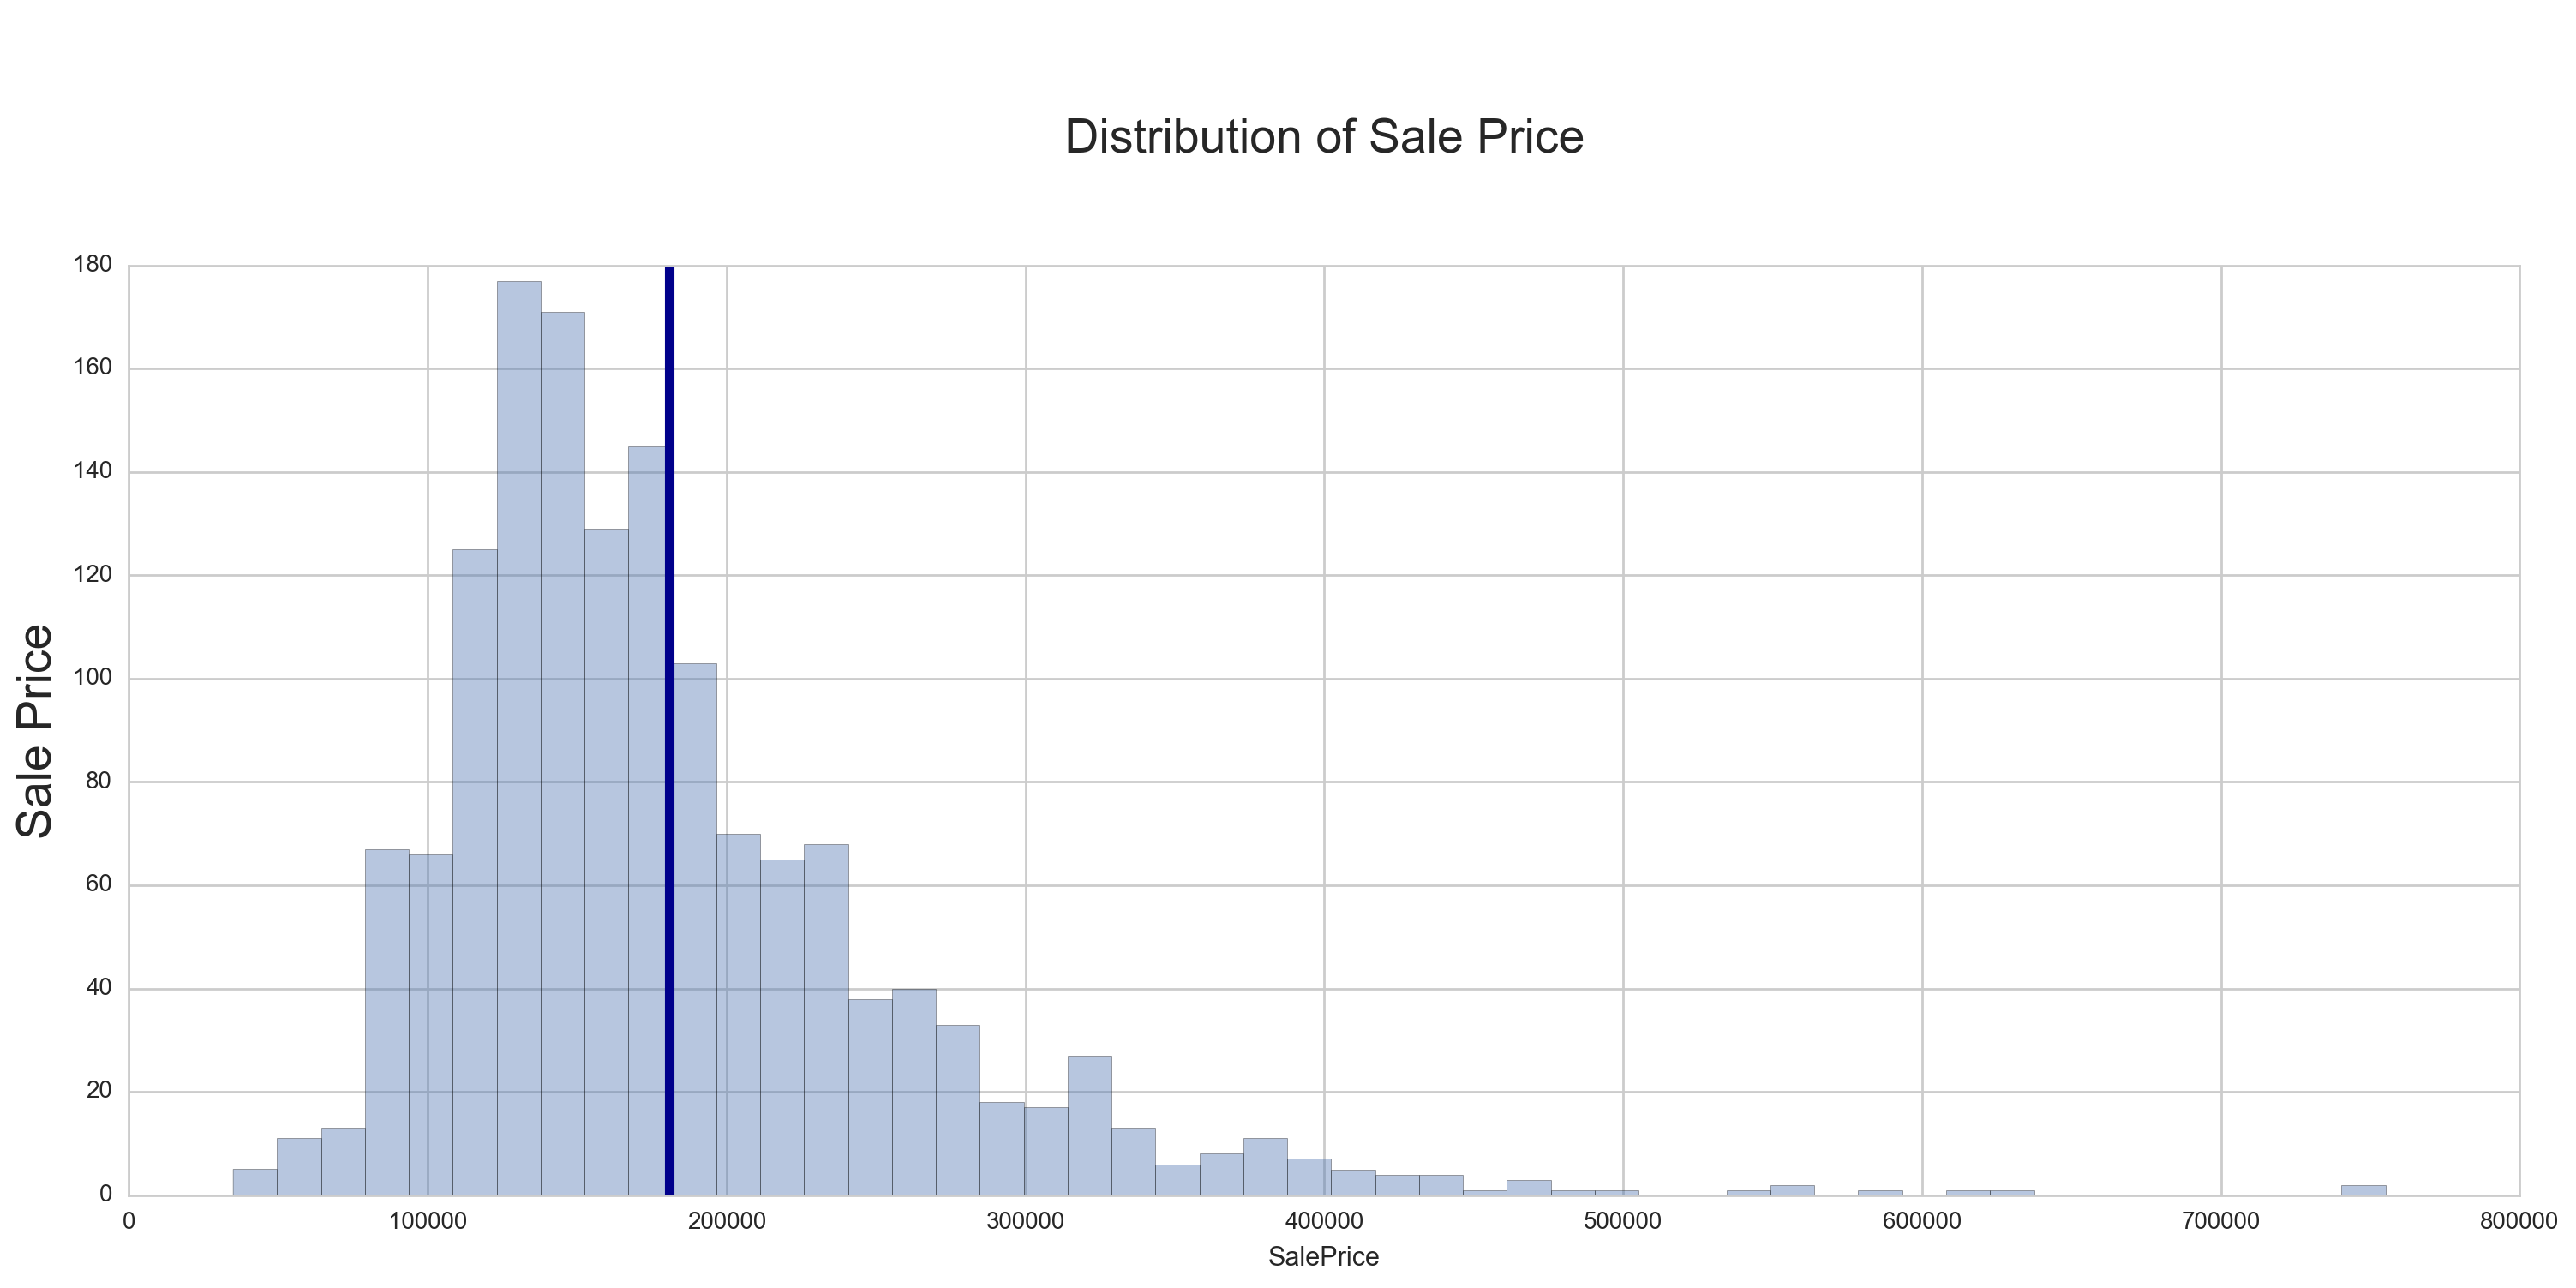

In [8]:
fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.distplot(house["SalePrice"], kde = False, ax = axarr)

axarr.set_title('\n\n Distribution of Sale Price \n\n', size = 20)
plt.ylabel('Sale Price', fontsize = 20)
axarr.axvline(x=np.mean(house['SalePrice']), lw = 4, color = 'darkblue')

plt.show()

In [9]:
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

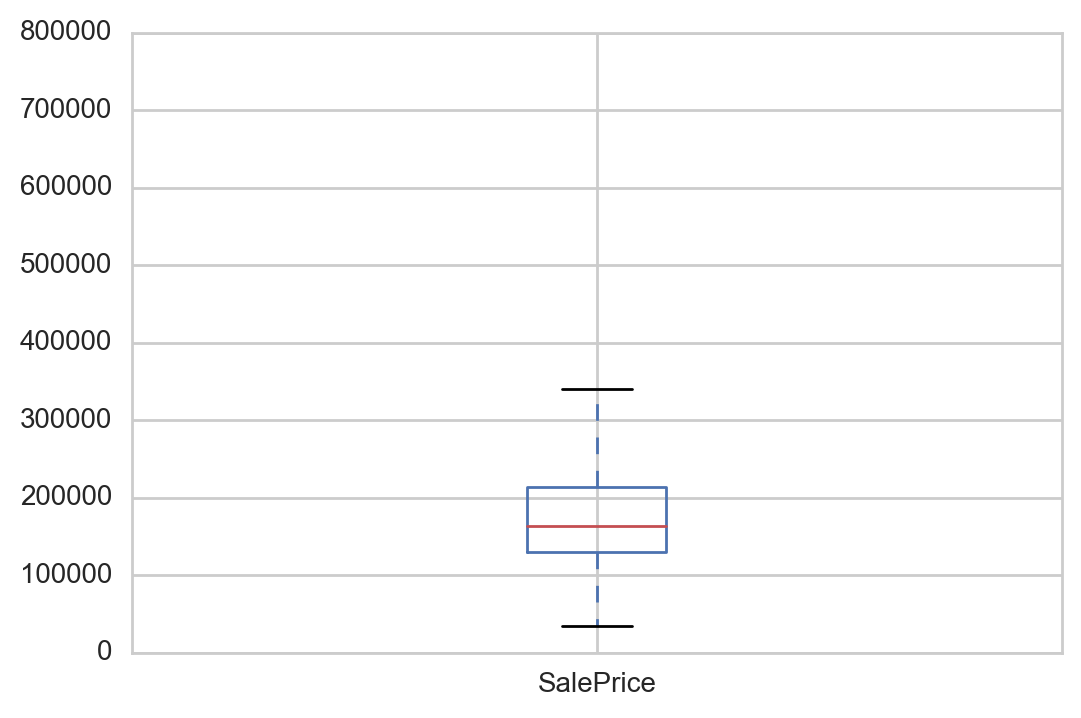

In [10]:
house['SalePrice'].plot.box()

### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

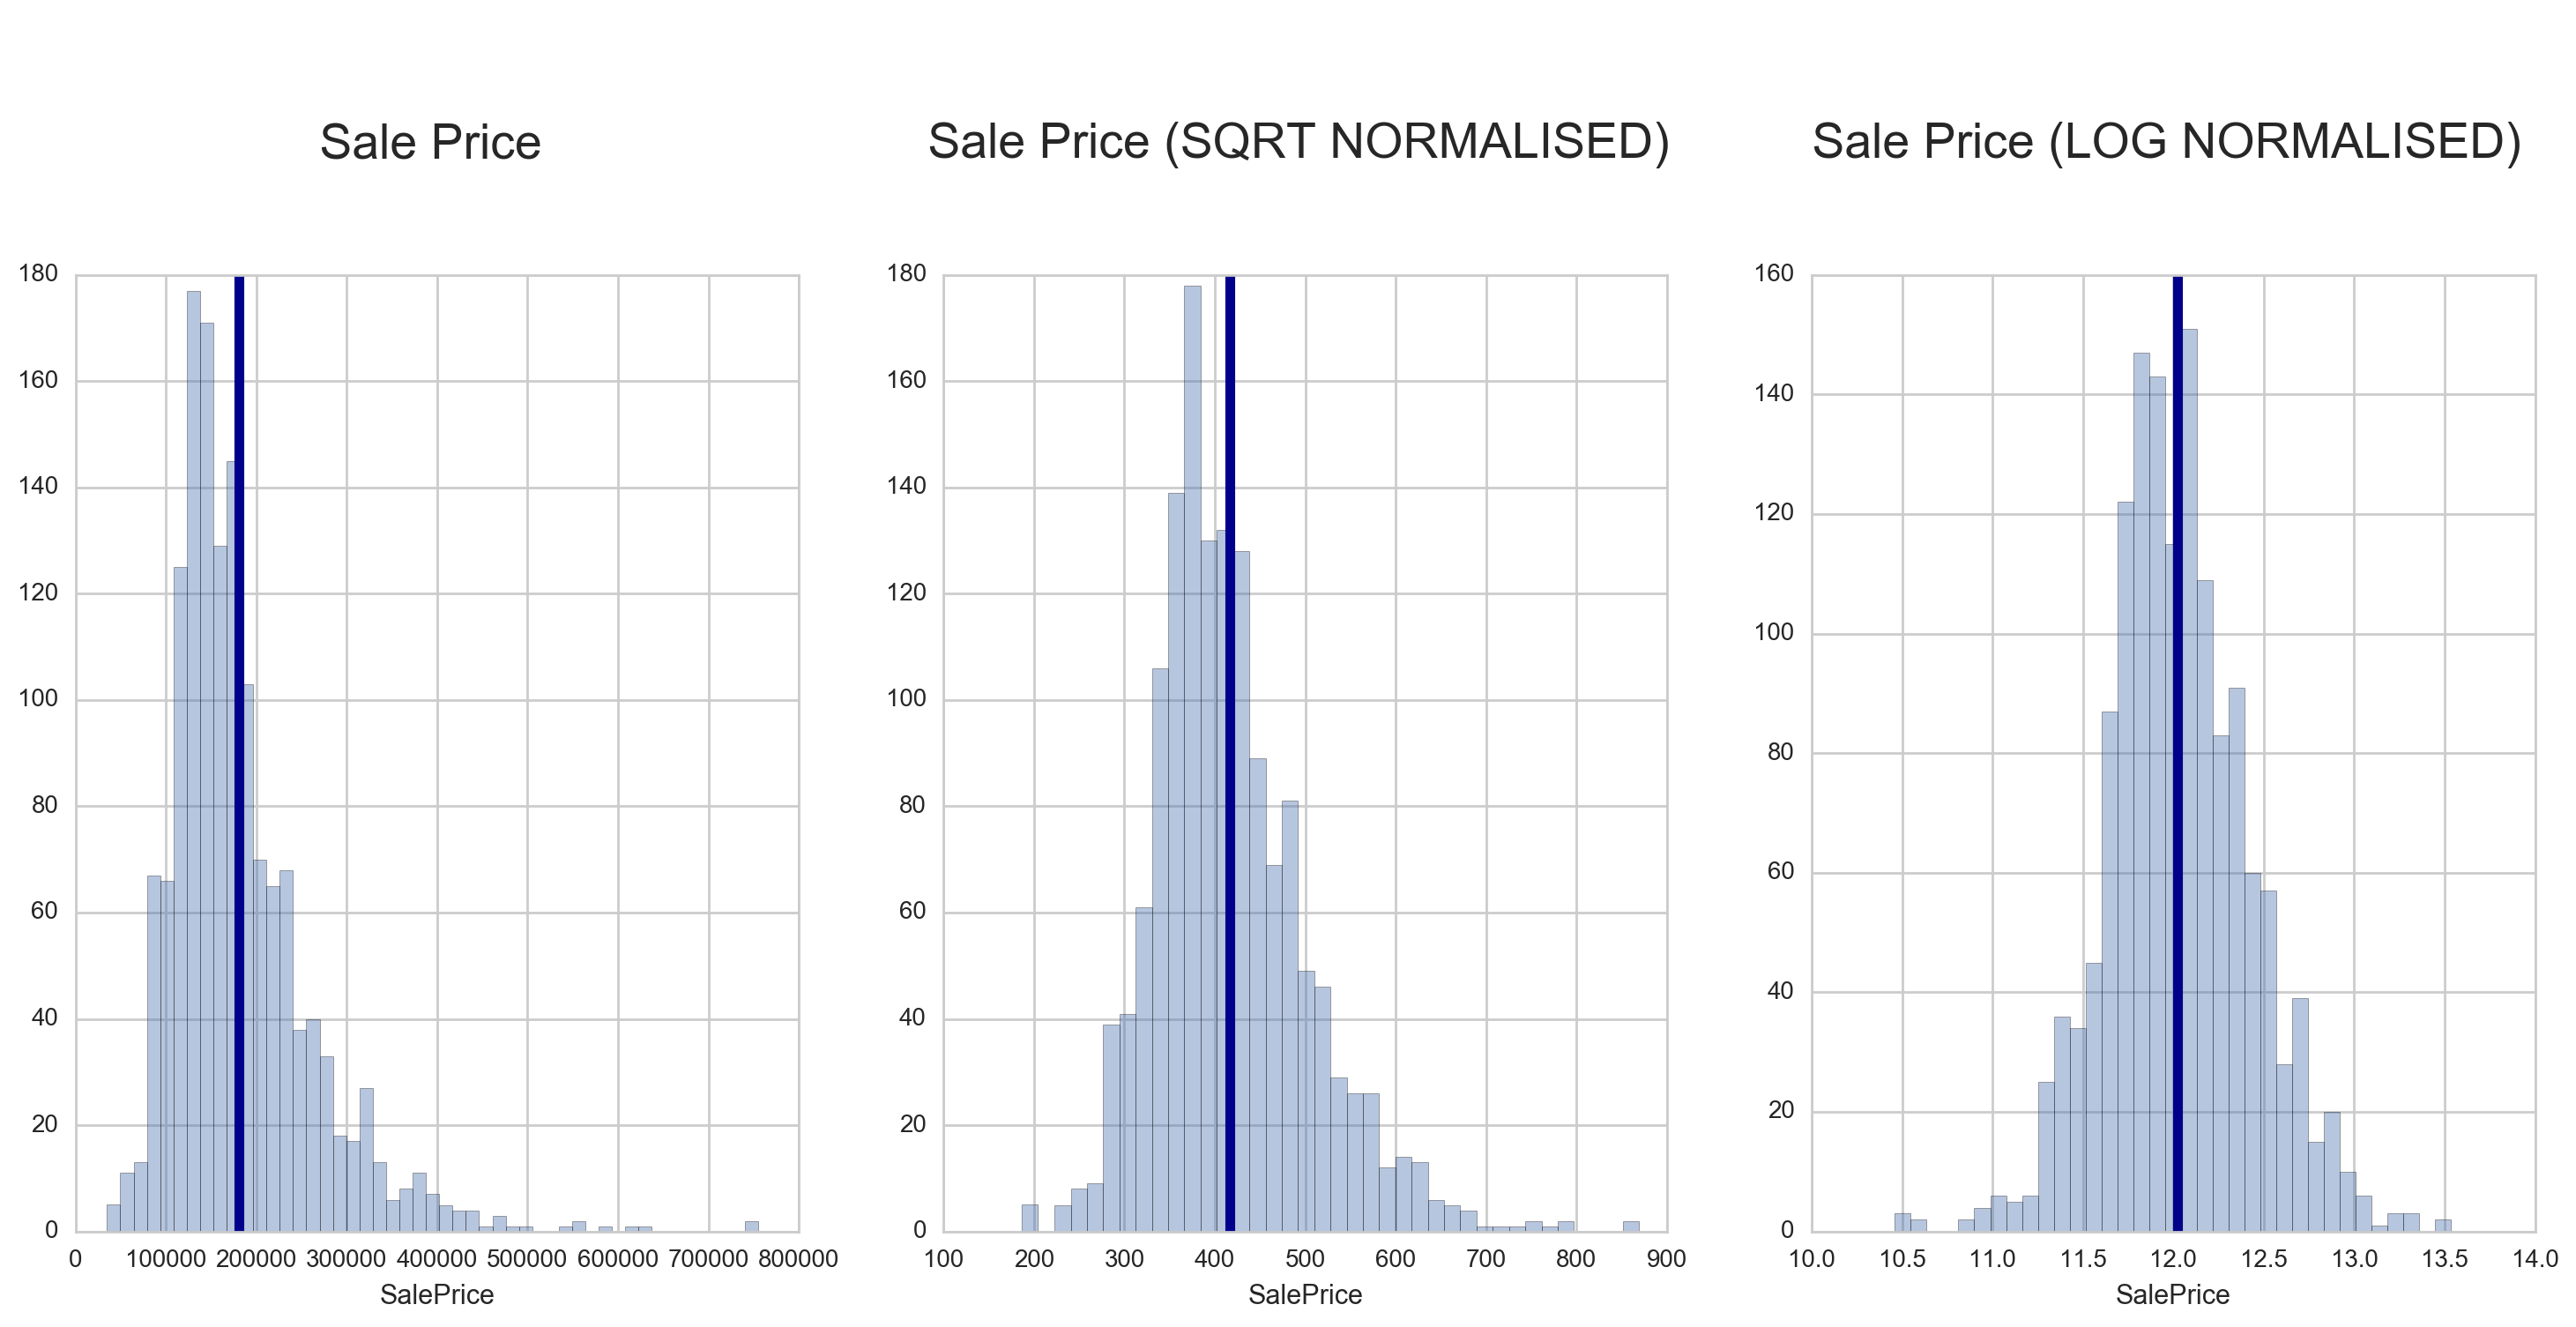

In [11]:
#1. taking the square root of SalePrice


saleprice_sqrt = house['SalePrice']**0.5
saleprice_log = np.log(house['SalePrice'])


fig, axarr = plt.subplots(1,3, figsize = (18,7))
axarr[0] = sns.distplot(house["SalePrice"], kde = False, ax = axarr[0])
axarr[1] = sns.distplot(saleprice_sqrt, kde = False, ax = axarr[1])
axarr[2] = sns.distplot(saleprice_log, kde = False, ax = axarr[2])

axarr[0].set_title('\n\n Sale Price  \n\n', size = 20)
axarr[0].axvline(x=np.mean(house['SalePrice']), lw = 4, color = 'darkblue')

axarr[1].set_title('\n\n Sale Price (SQRT NORMALISED)  \n\n', size = 20)
axarr[1].axvline(x=np.mean(saleprice_sqrt), lw = 4, color = 'darkblue')

axarr[2].set_title('\n\n Sale Price (LOG NORMALISED)  \n\n', size = 20)
axarr[2].axvline(x=np.mean(saleprice_log), lw = 4, color = 'darkblue')



plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


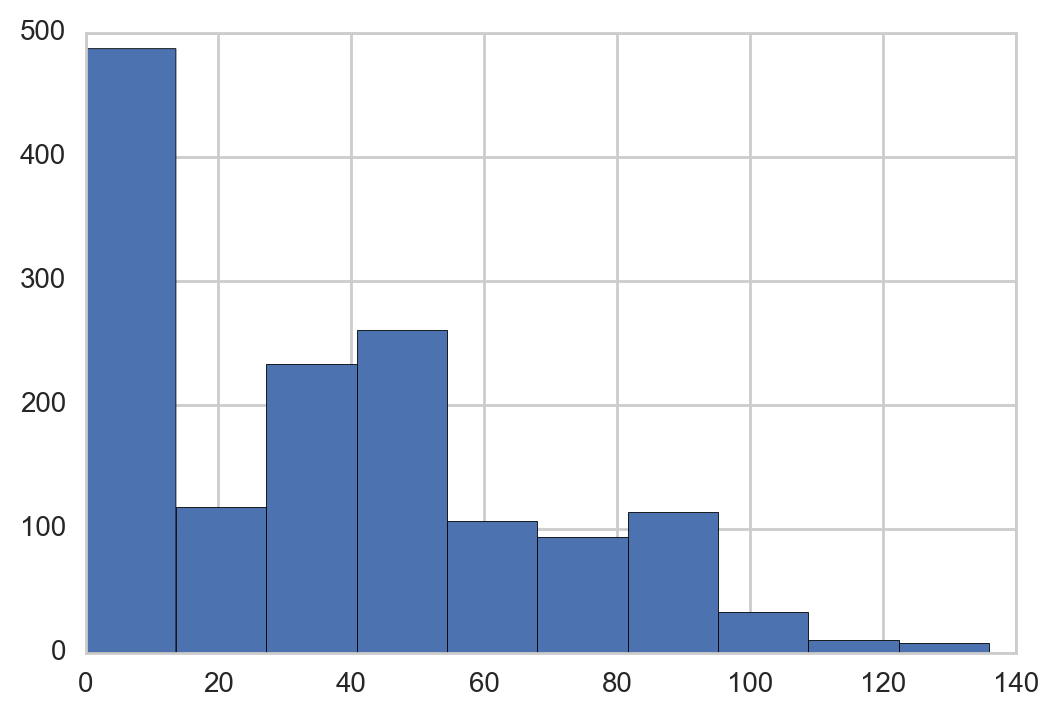

In [12]:
#creating a new "Age" column
house.Age = house.YrSold - house.YearBuilt
house.Age.hist()


In [13]:
corrcoef_age_sale_price = np.corrcoef(house.Age, house.SalePrice)
print "\n\n","Coefficient of correlation of Age vs SalePrice is : \n",corrcoef_age_sale_price[0,1],"\n\n"

corrcoef_age_sale_price_sqrt = np.corrcoef(house.Age, saleprice_sqrt)
print "\n\n","Coefficient of correlation of Age vs SalePrice SQRT is : \n",corrcoef_age_sale_price_sqrt[0,1],"\n\n"

corrcoef_age_sale_price_log = np.corrcoef(house.Age, saleprice_log)
print "\n\n","Coefficient of correlation of Age vs SalePrice LOG is : \n",corrcoef_age_sale_price_log[0,1],"\n\n"




Coefficient of correlation of Age vs SalePrice is : 
-0.523350417547 




Coefficient of correlation of Age vs SalePrice SQRT is : 
-0.564853444443 




Coefficient of correlation of Age vs SalePrice LOG is : 
-0.587290047029 




In [14]:
#The correlation is just slightly different when using normalised variables.

### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

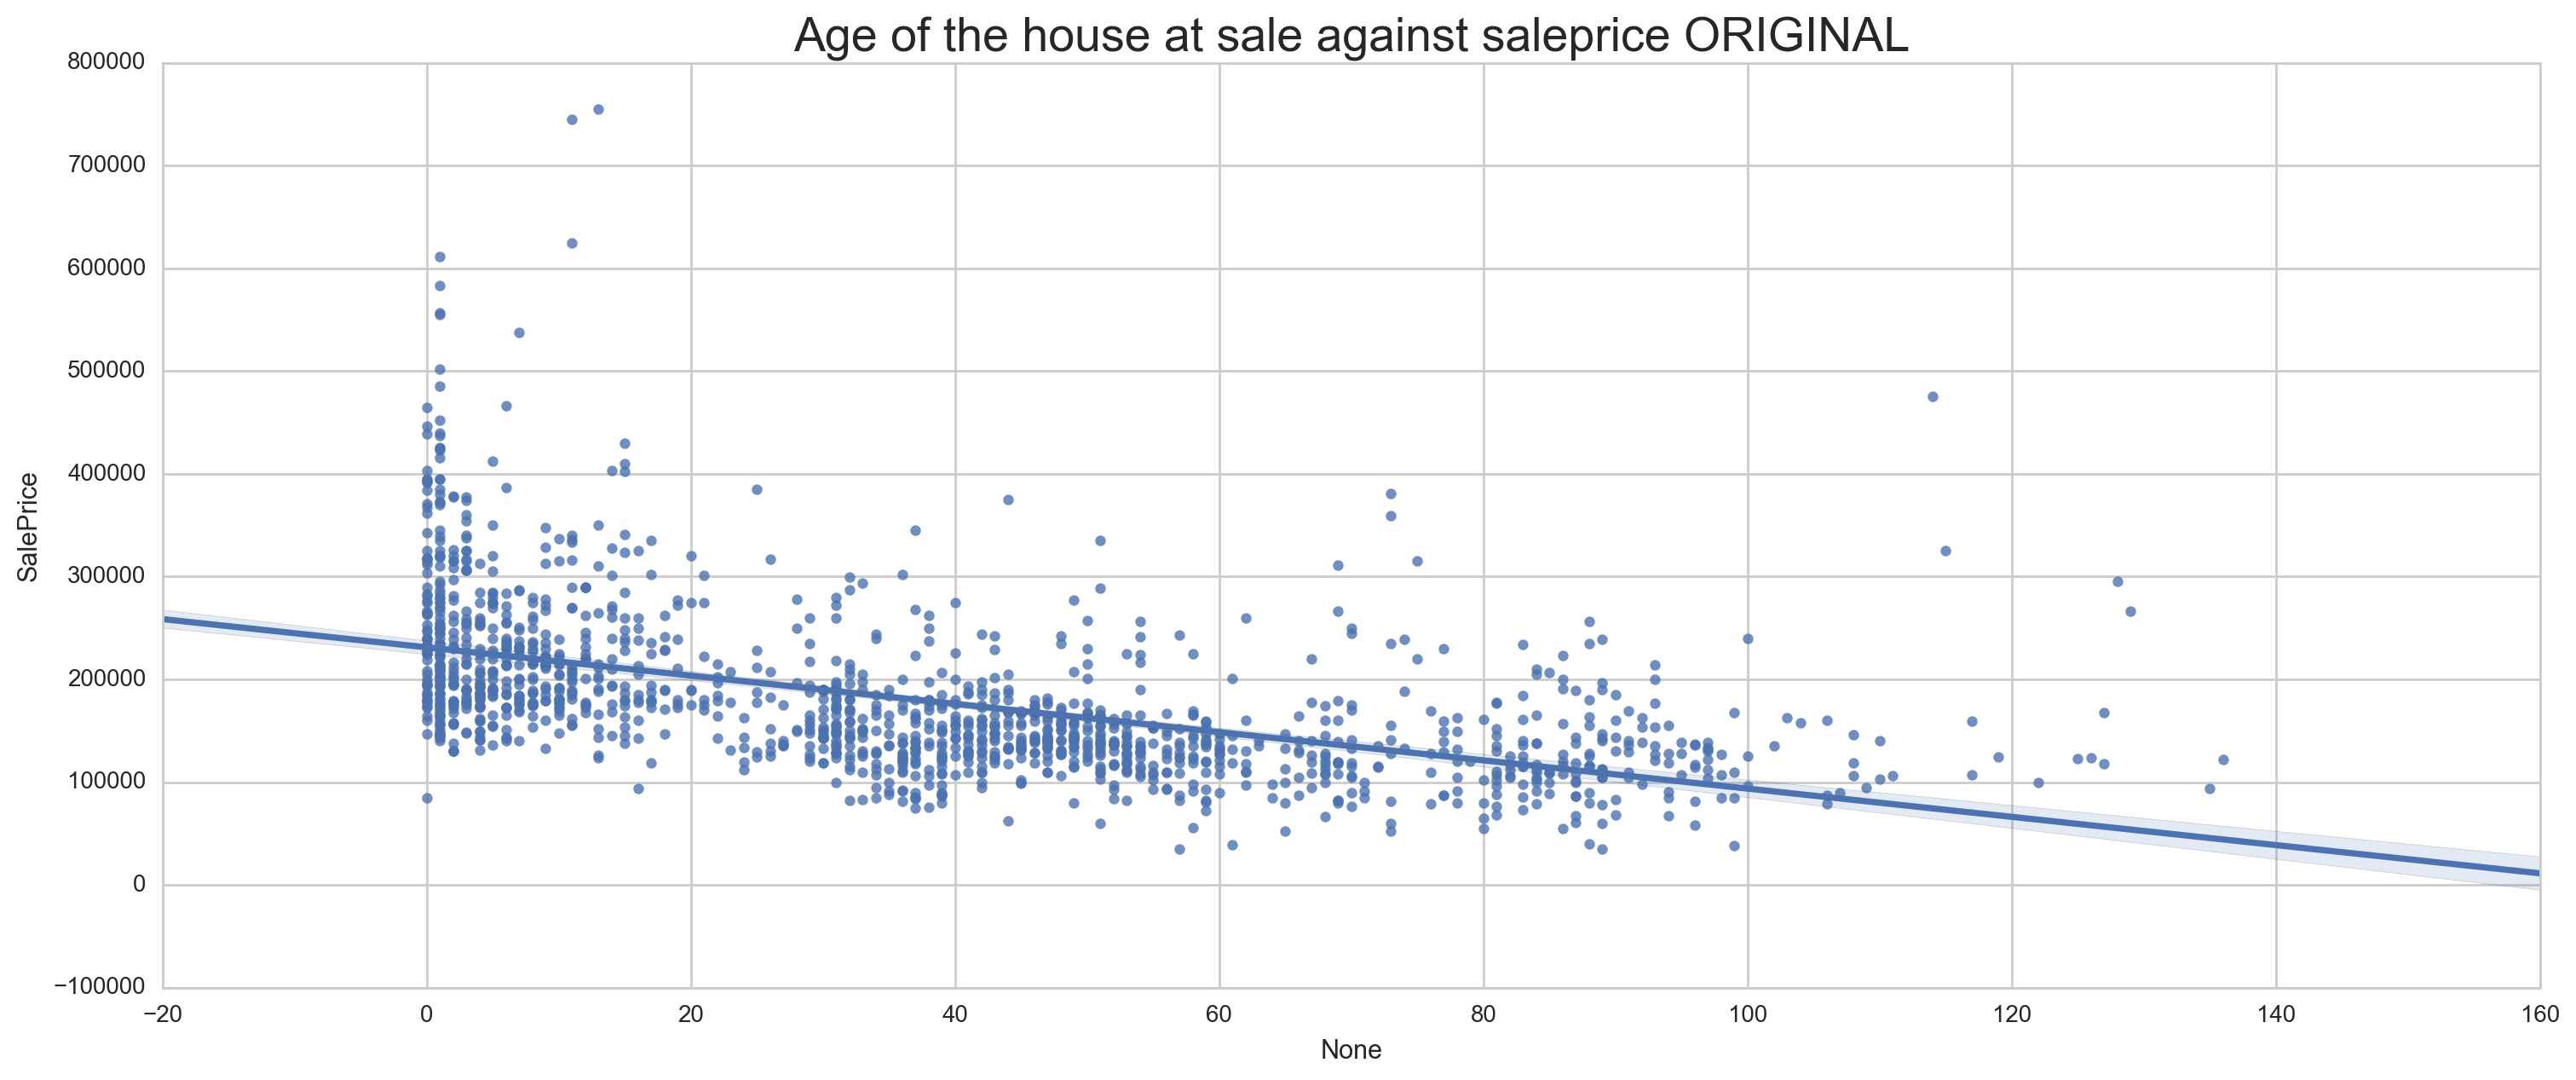

In [15]:
# Plot the age of the house at sale against saleprice ORIGINAL
#house.Age
#house.SalePrice

fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.regplot(x = house.Age, y = house.SalePrice ,ax = axarr)

axarr.set_title('Age of the house at sale against saleprice ORIGINAL', fontsize = 20)

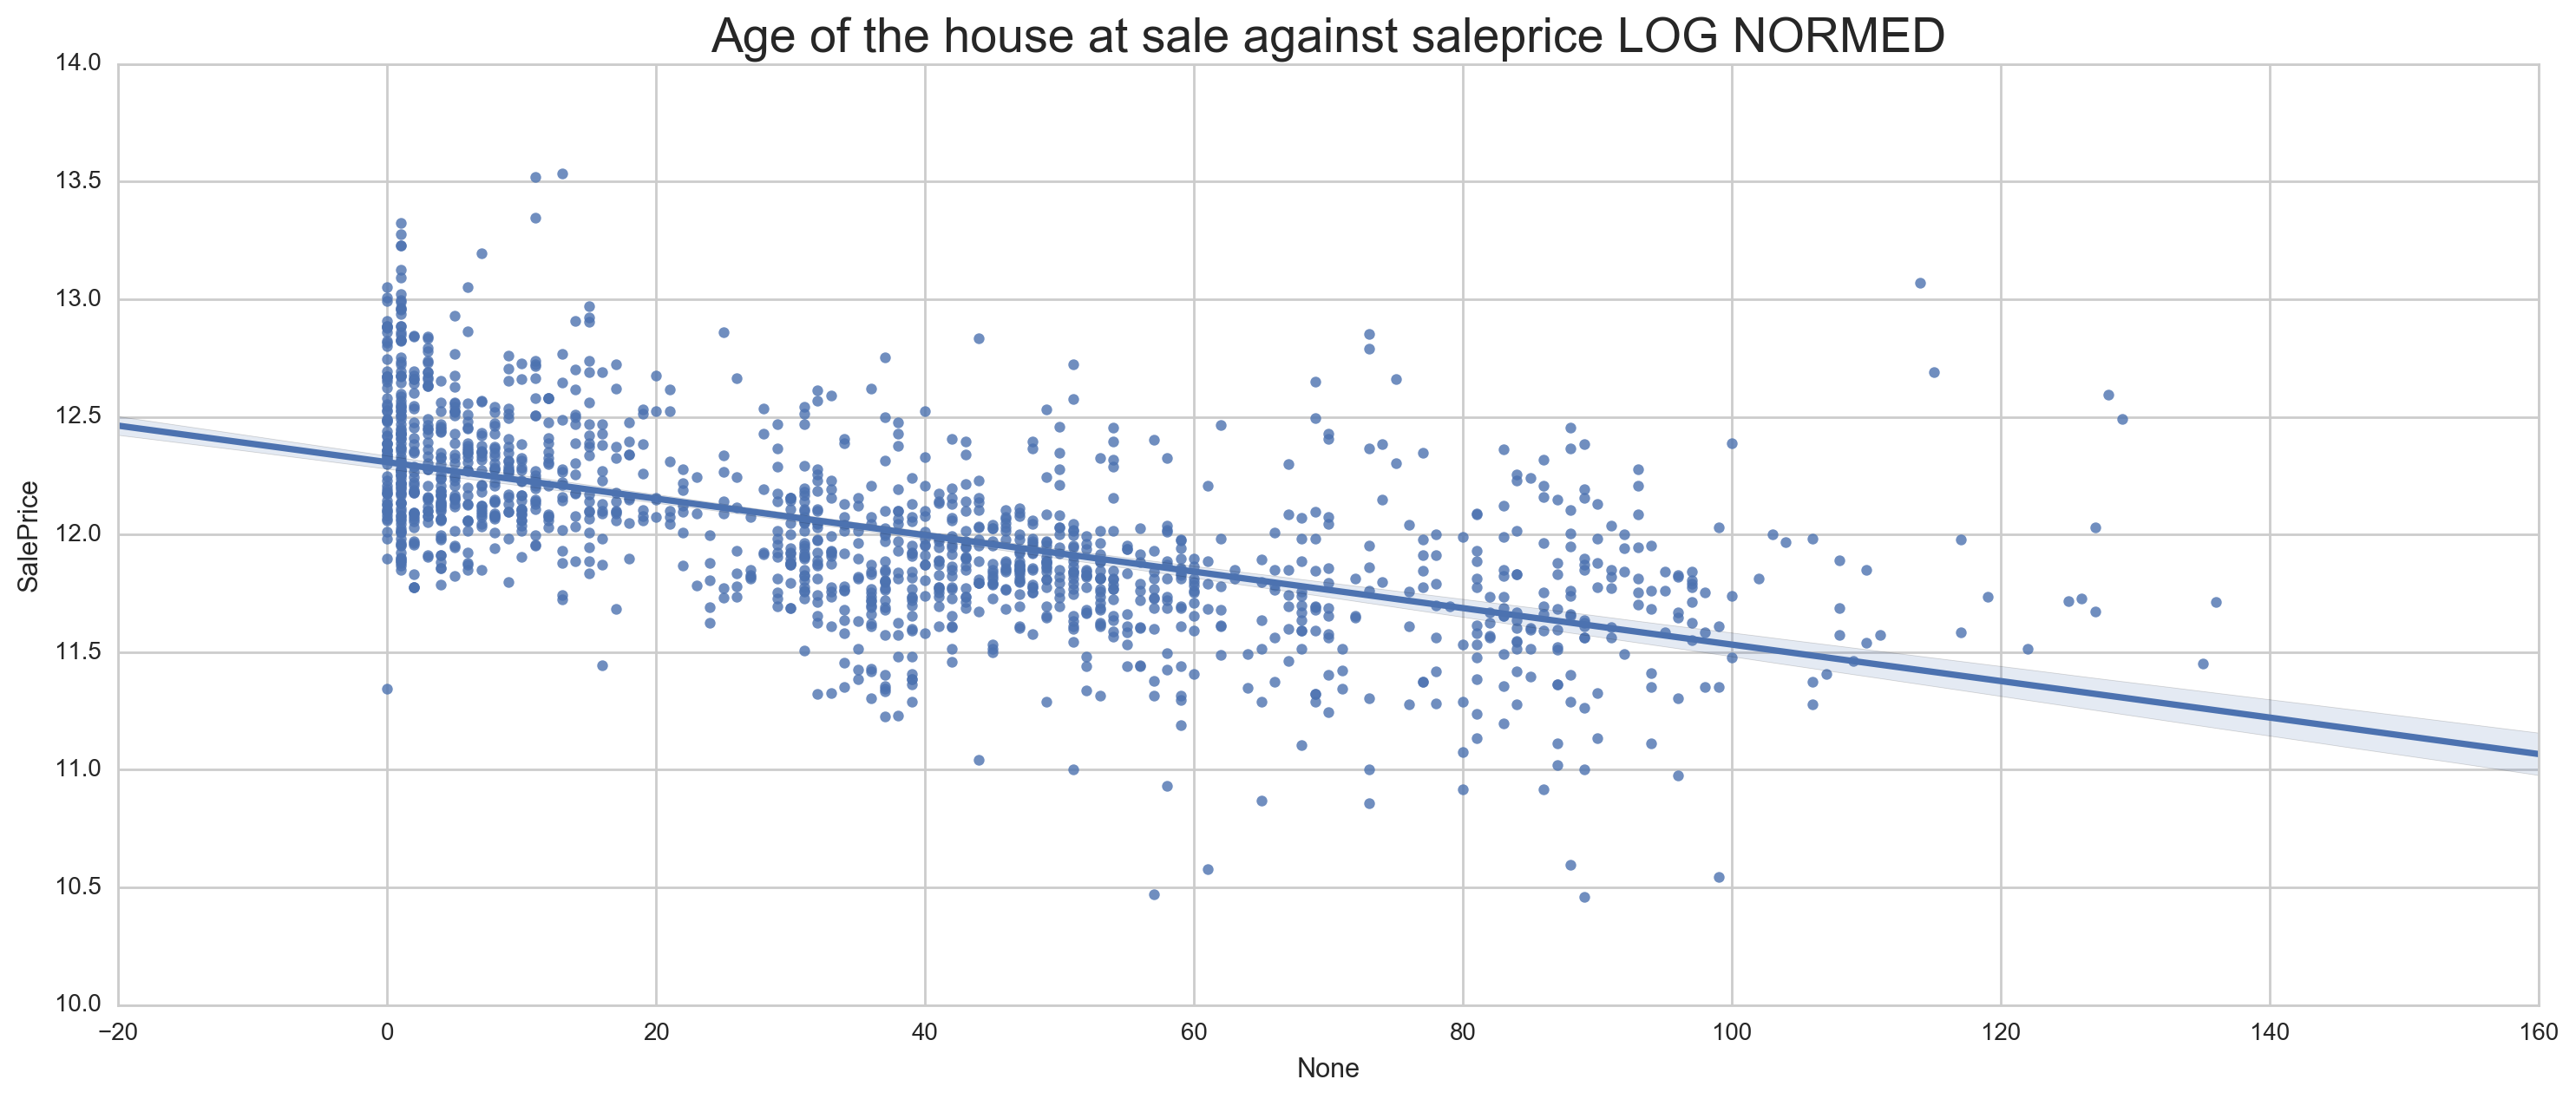

In [16]:
fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.regplot(x = house.Age, y = saleprice_log ,ax = axarr)

axarr.set_title('Age of the house at sale against saleprice LOG NORMED', fontsize = 20)


### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

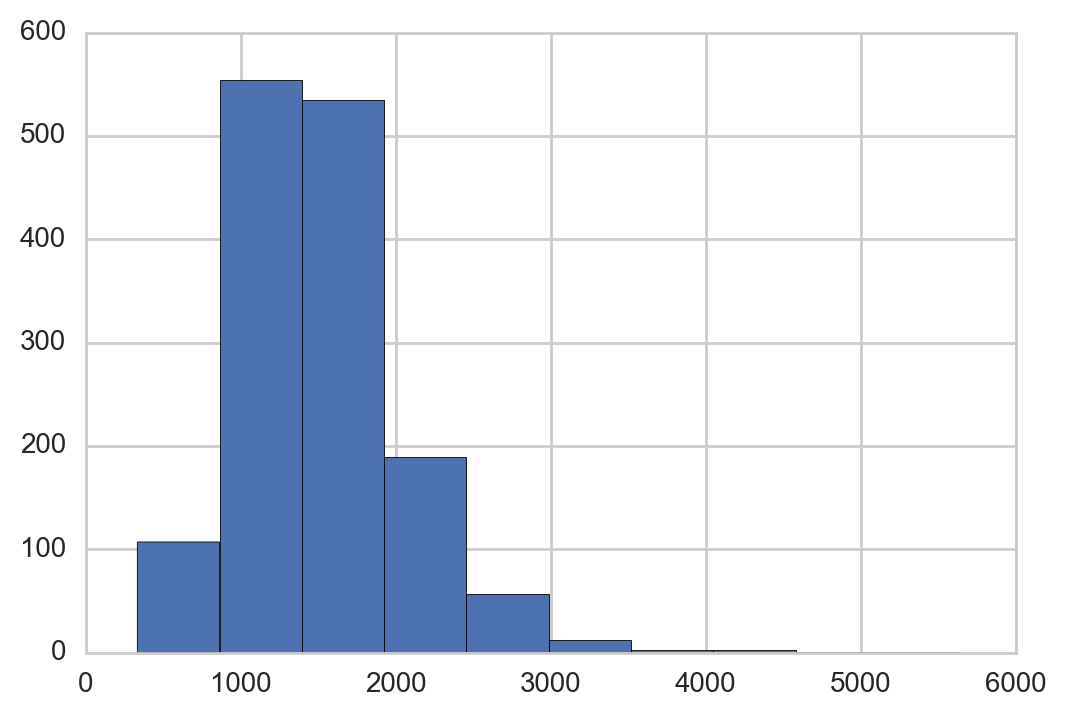

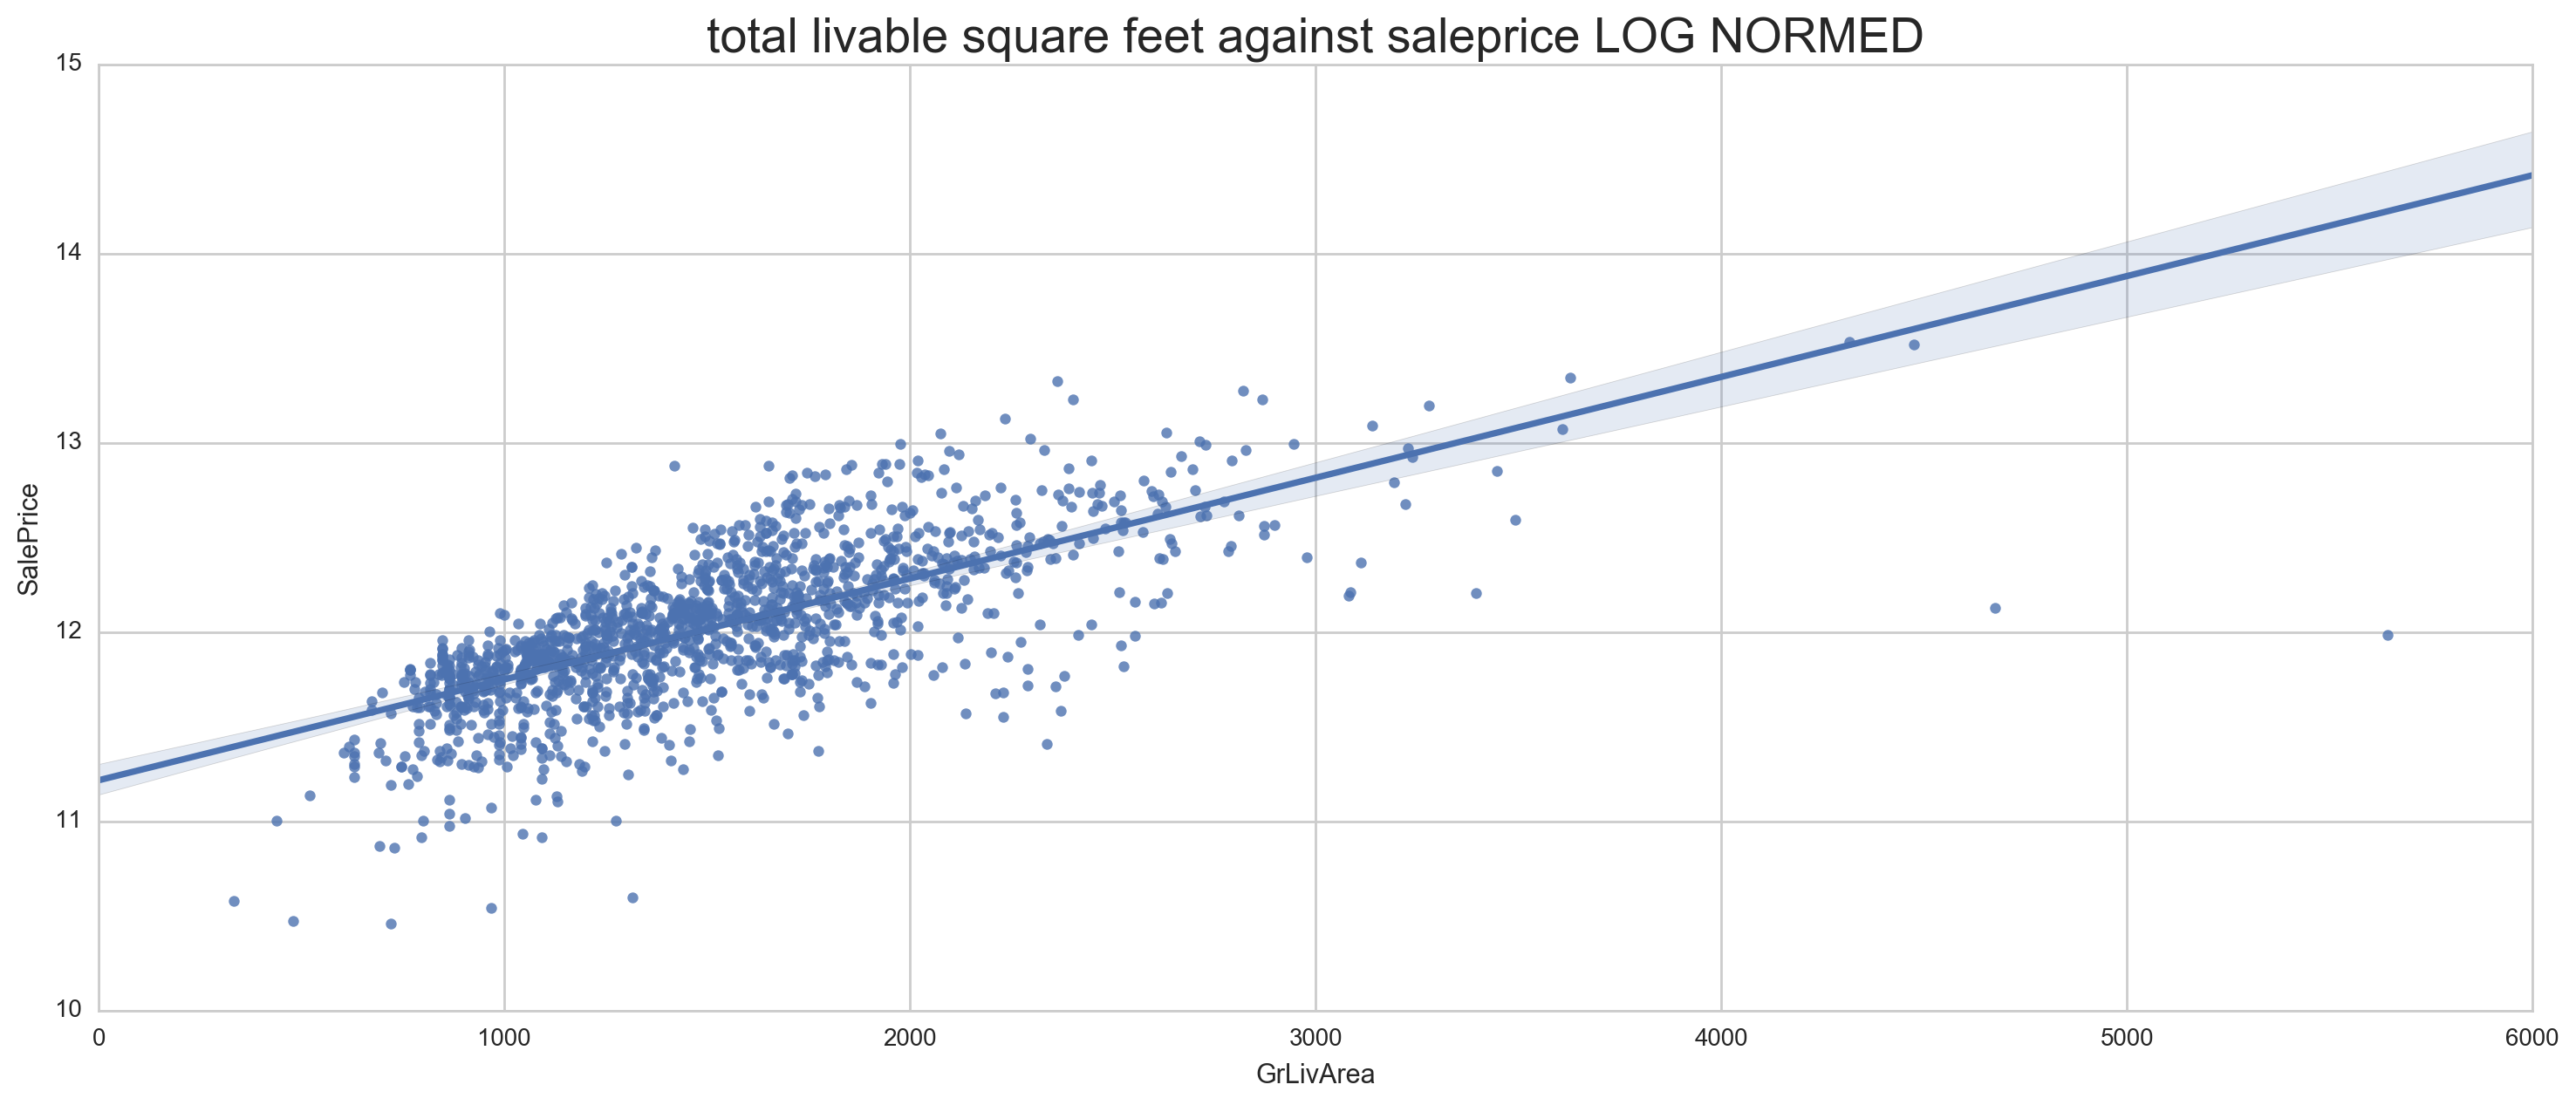

In [17]:
house.GrLivArea.hist()

fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.regplot(x = house.GrLivArea, y = saleprice_log ,ax = axarr)

axarr.set_title('total livable square feet against saleprice LOG NORMED', fontsize = 20)


In [18]:
# The two variables are pretty highly correlated.
# The biggest the livable square feet area, the higher the price


print "The correlation coefficient matrix of the variables is ",np.corrcoef(house.GrLivArea,saleprice_log)[0][1]
print "Which is pretty high.."

The correlation coefficient matrix of the variables is  0.700926652544
Which is pretty high..


### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart shows, if any?

*M: 
<br> There are two ways to retrieve highly correlated variables from a given set:

1. using a pairplot
2. doing a heat's map*

1. USING THE CORRELATION MATRIX

2. USING A PAIRPLOT

3. USING A HEATS MAP

In [20]:
house.shape

(1460, 81)

In [241]:
house.corr().head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.015291,-0.034304,-0.030440,0.010907,-0.017656,-0.021695,-0.052487,-0.003892,-0.006585,...,-0.031547,0.002112,0.007034,-0.047043,0.002628,0.057108,-0.007071,0.025820,-0.000176,-0.024353
MSSubClass,0.015291,1.000000,-0.139725,0.028891,-0.063504,0.030056,0.035989,0.023617,-0.074762,-0.065991,...,-0.012677,-0.002789,-0.011016,-0.044032,-0.030057,0.008308,-0.007172,-0.015808,-0.019356,-0.087487
LotArea,-0.034304,-0.139725,1.000000,0.106457,-0.006074,0.012958,0.013475,0.103071,0.214794,0.111037,...,0.171632,0.087333,-0.016954,0.020349,0.043435,0.077652,0.037468,0.001500,-0.013579,0.264715
OverallQual,-0.030440,0.028891,0.106457,1.000000,-0.107874,0.567392,0.544850,0.405799,0.235139,-0.062980,...,0.234394,0.320894,-0.104417,0.029411,0.062759,0.065112,-0.030910,0.078088,-0.024962,0.789031
OverallCond,0.010907,-0.063504,-0.006074,-0.107874,1.000000,-0.390446,0.067475,-0.130376,-0.053095,0.038818,...,-0.008204,-0.034037,0.079229,0.025010,0.053216,-0.002421,0.069996,0.003308,0.046202,-0.089084
YearBuilt,-0.017656,0.030056,0.012958,0.567392,-0.390446,1.000000,0.590105,0.308690,0.248222,-0.052726,...,0.220369,0.197950,-0.380911,0.030387,-0.051326,0.004250,-0.034681,0.017254,-0.009111,0.517602
YearRemodAdd,-0.021695,0.035989,0.013475,0.544850,0.067475,0.590105,1.000000,0.173008,0.123137,-0.070913,...,0.201867,0.237689,-0.187094,0.044605,-0.042288,0.005259,-0.009716,0.023540,0.040420,0.501186
MasVnrArea,-0.052487,0.023617,0.103071,0.405799,-0.130376,0.308690,0.173008,1.000000,0.260390,-0.072568,...,0.157778,0.126115,-0.106982,0.018708,0.062015,0.011671,-0.029415,-0.004747,-0.006922,0.471056
BsmtFinSF1,-0.003892,-0.074762,0.214794,0.235139,-0.053095,0.248222,0.123137,0.260390,1.000000,-0.051244,...,0.203239,0.111795,-0.098826,0.026138,0.059746,0.140668,0.004120,-0.017519,0.018654,0.384475
BsmtFinSF2,-0.006585,-0.065991,0.111037,-0.062980,0.038818,-0.052726,-0.070913,-0.072568,-0.051244,1.000000,...,0.066687,0.003697,0.038838,-0.030235,0.088801,0.041585,0.005015,-0.014277,0.032596,-0.014145


In [22]:
len(house.corr().columns)

coeff_corr = {}

# retrieving all the couples of variable in the correlation matrix, as well as their correlatin number
for i in range(len(house.corr().columns)):
    for j in range(i+1,len(house.corr().columns)):
        
        var_i = house.corr().columns[i]
        var_j = house.corr().columns[j]
        print "var_i : ",var_i
        print "var_j : ",var_j
        
        coeff_ij = house.corr().loc[var_i,var_j]
        print "coeff_ij",coeff_ij
        coeff_corr[var_i + " , " + var_j] = coeff_ij
        
        print "\n"

# sorting the couples by the highest correlation coefficients
coeffs_sorted = pd.DataFrame.from_dict(coeff_corr,orient = 'index').reset_index()
coeffs_sorted.columns = ['variables', 'coeffs']
coeffs_sorted

most_correlated_vars = coeffs_sorted.sort(columns='coeffs', axis=0, ascending=False).head(10)
print "\n 10 most correlated variables are the following ones : \n\n",most_correlated_vars
        


var_i :  Id
var_j :  MSSubClass
coeff_ij 0.0111564782014


var_i :  Id
var_j :  LotFrontage
coeff_ij -0.0106006885524


var_i :  Id
var_j :  LotArea
coeff_ij -0.0332255185857


var_i :  Id
var_j :  OverallQual
coeff_ij -0.0283647539375


var_i :  Id
var_j :  OverallCond
coeff_ij 0.012608924776


var_i :  Id
var_j :  YearBuilt
coeff_ij -0.0127127153878


var_i :  Id
var_j :  YearRemodAdd
coeff_ij -0.0219976418575


var_i :  Id
var_j :  MasVnrArea
coeff_ij -0.0502977951717


var_i :  Id
var_j :  BsmtFinSF1
coeff_ij -0.00502404904166


var_i :  Id
var_j :  BsmtFinSF2
coeff_ij -0.00596767196028


var_i :  Id
var_j :  BsmtUnfSF
coeff_ij -0.00793970335772


var_i :  Id
var_j :  TotalBsmtSF
coeff_ij -0.0154145661079


var_i :  Id
var_j :  1stFlrSF
coeff_ij 0.0104960409541


var_i :  Id
var_j :  2ndFlrSF
coeff_ij 0.00558984888616


var_i :  Id
var_j :  LowQualFinSF
coeff_ij -0.0442299580866


var_i :  Id
var_j :  GrLivArea
coeff_ij 0.00827275766181


var_i :  Id
var_j :  BsmtFullBath
coeff_ij 

{'1stFlrSF , 2ndFlrSF': -0.20264618100231988,
 '1stFlrSF , 3SsnPorch': 0.056104374484874743,
 '1stFlrSF , BedroomAbvGr': 0.12740074939236587,
 '1stFlrSF , BsmtFullBath': 0.24467110424771435,
 '1stFlrSF , BsmtHalfBath': 0.0019556535820487758,
 '1stFlrSF , EnclosedPorch': -0.065291700910309017,
 '1stFlrSF , Fireplaces': 0.41053108465984434,
 '1stFlrSF , FullBath': 0.38063749497350763,
 '1stFlrSF , GarageArea': 0.4897816541041915,
 '1stFlrSF , GarageCars': 0.43931680799067063,
 '1stFlrSF , GarageYrBlt': 0.23344909271486305,
 '1stFlrSF , GrLivArea': 0.56602396893574869,
 '1stFlrSF , HalfBath': -0.11991590879396018,
 '1stFlrSF , KitchenAbvGr': 0.068100588176913543,
 '1stFlrSF , LowQualFinSF': -0.014240672666431465,
 '1stFlrSF , MiscVal': -0.021095719463122858,
 '1stFlrSF , MoSold': 0.031371560352079074,
 '1stFlrSF , OpenPorchSF': 0.21167122549798492,
 '1stFlrSF , PoolArea': 0.13152497564028195,
 '1stFlrSF , SalePrice': 0.6058521846919166,
 '1stFlrSF , ScreenPorch': 0.088758072620156406,
 '1


Most correlated variables are the following ones : 

                       variables    coeffs
342      GarageCars , GarageArea  0.882475
159      YearBuilt , GarageYrBlt  0.825667
443     GrLivArea , TotRmsAbvGrd  0.825489
73        TotalBsmtSF , 1stFlrSF  0.819530
526      OverallQual , SalePrice  0.790982
30         GrLivArea , SalePrice  0.708624
525         2ndFlrSF , GrLivArea  0.687501
193  BedroomAbvGr , TotRmsAbvGrd  0.676620
398    BsmtFinSF1 , BsmtFullBath  0.649212
634   YearRemodAdd , GarageYrBlt  0.642277


/Users/medhimugnier/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


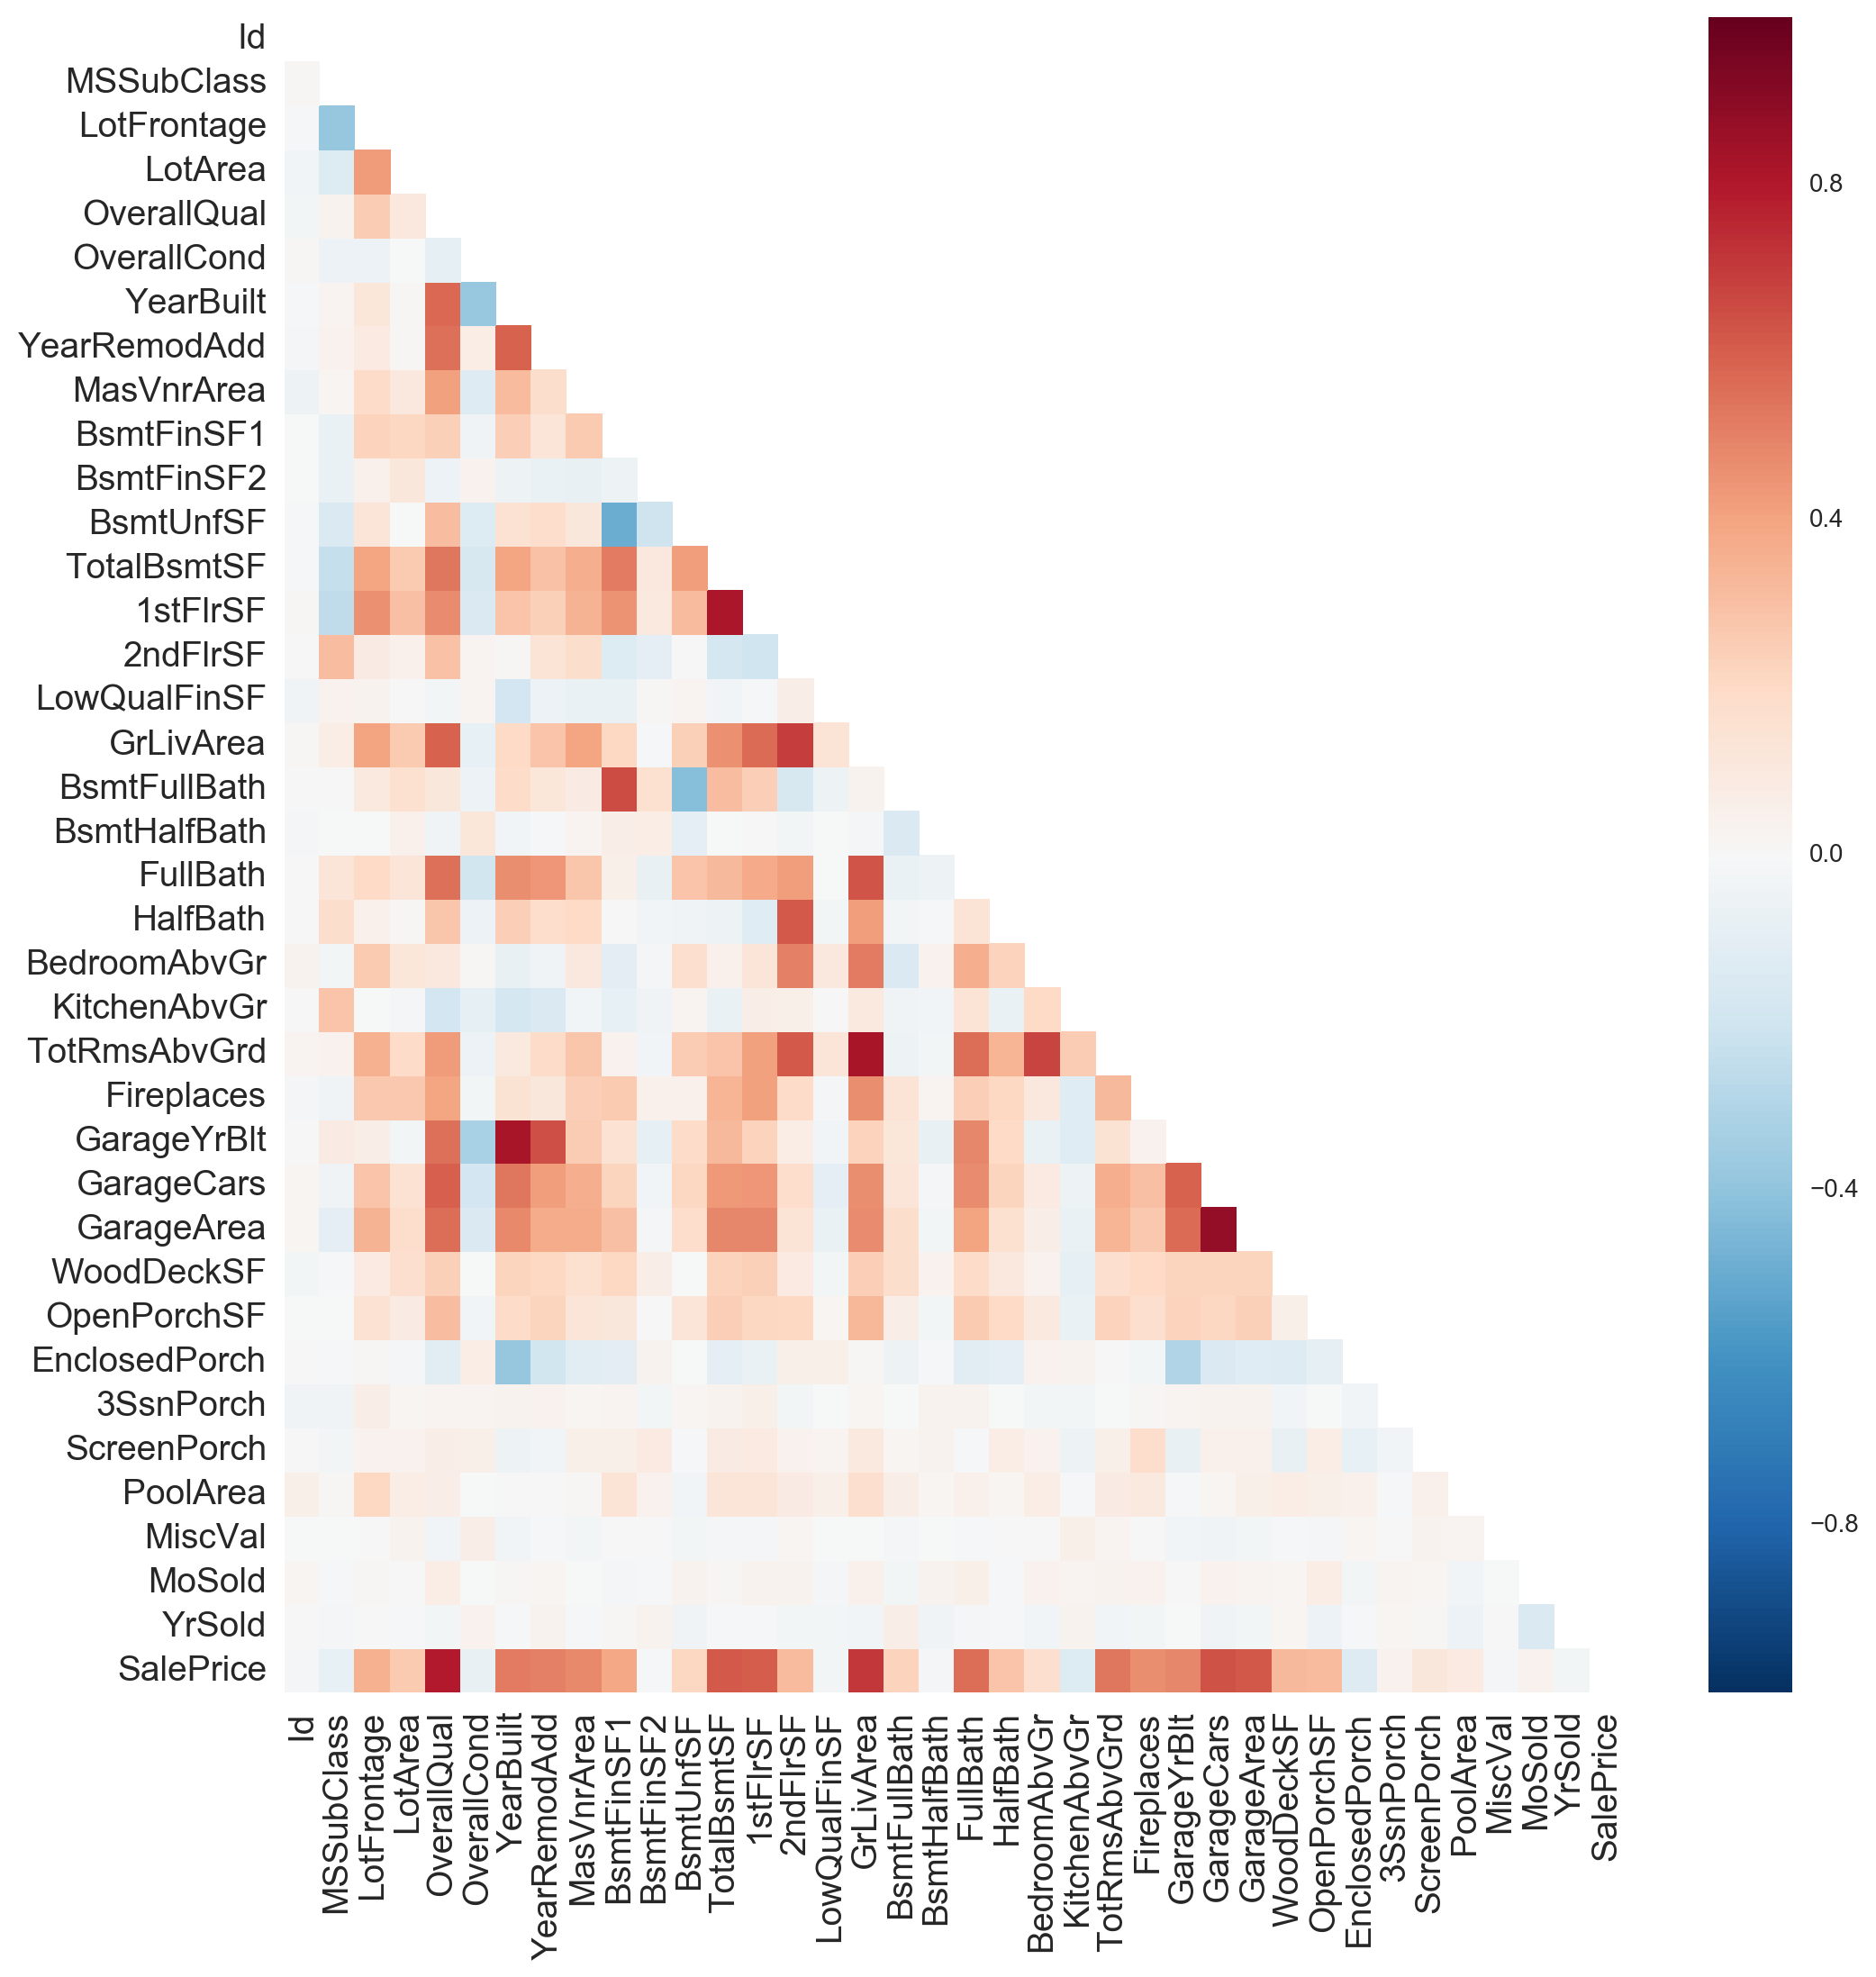

In [24]:

def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(house)

In [ ]:
# it looks like this 2 variables are much correlated:

#house.SalePrice
#house.OverallQual which rates the overall material and finish of the house



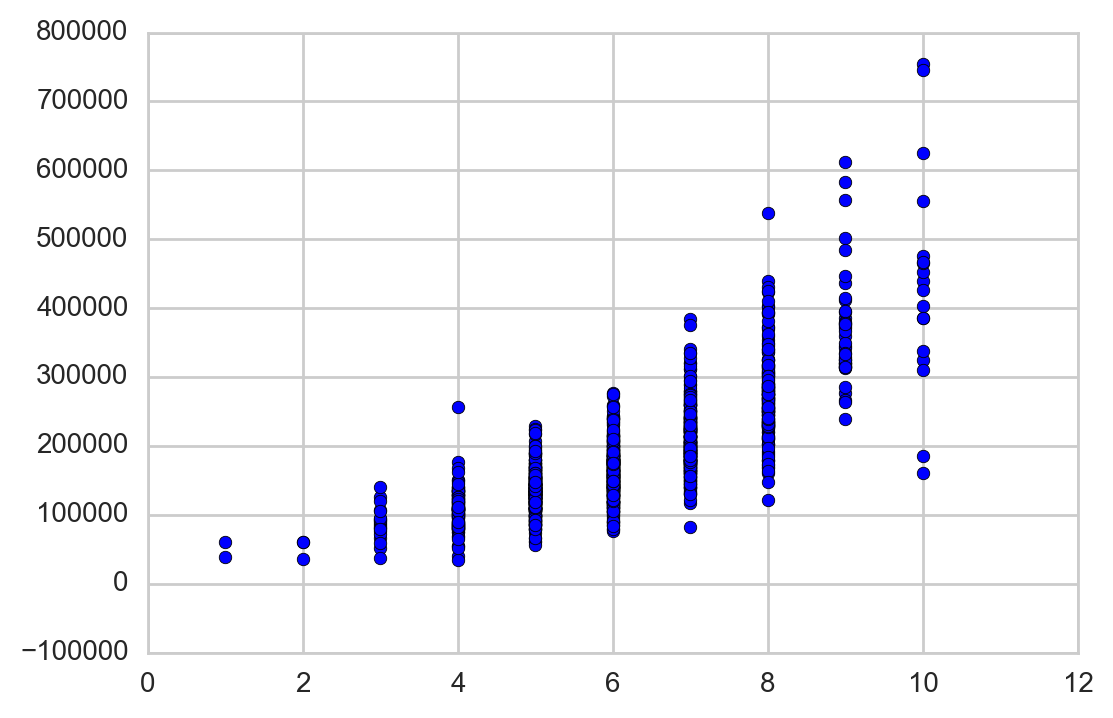

In [25]:
plt.scatter(house.OverallQual,house.SalePrice)
plt.show()

In [29]:
#which is confirmed by the scatter plot above.

print "corrcoef(house.SalePrice, house.OverallQual) = ", np.corrcoef(house.SalePrice, house.OverallQual)[1][0]

#the correlation coefficient is by the waypretty high

corrcoef(house.SalePrice, house.OverallQual) =  0.790981600584


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

In [32]:
house.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [35]:
# 'C (all)'  is the value that represents the commercial buildings.
house =  house[house.MSZoning != 'C (all)']
# We've just reassigned house to a DataFrame with no Commercial building.
house.shape

(1450, 81)

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

In [67]:
nb_of_null = house.isnull().sum()

#selecting only the columns that do have at least one null value
cols_w_null_mask = nb_of_null[nb_of_null != 0]
cols_w_null = cols_w_null_mask.reset_index()
cols_w_null.columns = ['var','nb_of_nulls']
cols_w_null.sort_values('nb_of_nulls',ascending = False, inplace = True)
print cols_w_null

             var  nb_of_nulls
16        PoolQC         1443
18   MiscFeature         1398
1          Alley         1361
17         Fence         1172
10   FireplaceQu          681
0    LotFrontage          259
11    GarageType           79
12   GarageYrBlt           79
13  GarageFinish           79
14    GarageQual           79
15    GarageCond           79
6   BsmtExposure           38
8   BsmtFinType2           38
7   BsmtFinType1           37
5       BsmtCond           37
4       BsmtQual           37
3     MasVnrArea            8
2     MasVnrType            8
9     Electrical            1


In [62]:
#let's check each variable one by one

(1450, 77)

In [112]:
#PoolQC
# desc.: Pool Quality
print house.PoolQC.unique()
print house.PoolQC[house.PoolQC.isnull()].unique()
#---> they're are too many missing values (1443 out of 1450) for a global impute to be relevant. 
# All of the null values are NaN, because there is no pool in the given house (the number of 0 values in the house.PoolArea is the exact same number of null values). 
# So let's fill in this column with 'Na' instead.

house.PoolQC.fillna('Na', inplace = True)
house.PoolQC.isnull().sum()
# Now, there are no more null values in this Series.

['Na' 'Ex' 'Fa' 'Gd']
[]


0

In [118]:
#MiscFeature 
#desc.: Miscellaneous feature not covered in other categories
house.MiscFeature.value_counts()
#let's add a value for this variable, which would be None.
house.MiscFeature.fillna('None',inplace = True)

None    1398
Shed      47
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [124]:
#Alley
#desc.: Type of alley access to property
house.Alley.value_counts()
#here again, it seems that all null values correspond in reality to a NA (meaning the house has no alley).
#replacing these values by NAs
house.Alley.fillna('NA', inplace = True)

0

In [127]:
#Fence
#desc. Fence quality
house.Fence.value_counts()
#here again, it seems that all null values correspond in reality to a NA.
#replacing these values by NAs
house.Fence.fillna('NA', inplace = True)

NA       1172
MnPrv     155
GdPrv      59
GdWo       53
MnWw       11
Name: Fence, dtype: int64

In [134]:
#FireplaceQu
#desc. Fireplace quality
house.FireplaceQu.value_counts()
#here again, it seems that all null values correspond in reality to a NA.
#this is confirmed by the column "Fireplaces", for which 681 values have "0 fireplace".
#replacing FireplaceQu values by NAs
house.FireplaceQu.fillna('NA', inplace = True)

In [486]:
#LotFrontage
#desc. Linear feet of street connected to property
house.LotFrontage.value_counts()
house.LotFrontage.replace('NA',0, inplace = True)
house.LotFrontage.value_counts()

0.0      259
60.0     139
70.0      70
80.0      69
50.0      55
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
24.0      19
68.0      19
64.0      19
73.0      18
79.0      17
72.0      17
55.0      17
63.0      17
100.0     16
74.0      15
51.0      15
52.0      14
66.0      13
59.0      13
43.0      12
40.0      12
71.0      12
67.0      12
82.0      12
        ... 
174.0      2
122.0      2
313.0      2
118.0      2
115.0      2
97.0       2
114.0      2
109.0      2
101.0      2
116.0      2
38.0       1
168.0      1
160.0      1
153.0      1
33.0       1
152.0      1
150.0      1
149.0      1
144.0      1
140.0      1
39.0       1
141.0      1
138.0      1
137.0      1
106.0      1
46.0       1
111.0      1
112.0      1
128.0      1
182.0      1
Name: LotFrontage, dtype: int64

In [161]:
# number of missing values is equal for the Garage variables below

#GarageType           79
#GarageYrBlt           79
#GarageFinish           79
#GarageQual           79
#GarageCond           79

# we can safely assume there is no Garage in this case, and replace null values with NAs

for col in ['GarageType' , 'GarageYrBlt' , 'GarageFinish' , 'GarageQual' , 'GarageCond']:
    house[col].fillna('NA', inplace = True)

NA        79
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
2001.0    20
1957.0    20
1958.0    20
1996.0    20
1970.0    20
1960.0    19
1954.0    19
1997.0    19
1978.0    19
1974.0    18
          ..
1926.0     6
1916.0     5
1936.0     5
1922.0     5
1945.0     4
1946.0     4
1935.0     4
1931.0     4
1982.0     4
1928.0     4
1910.0     3
1921.0     3
1923.0     3
1924.0     3
2010.0     3
1932.0     3
1938.0     3
1929.0     2
1934.0     2
1937.0     2
1918.0     2
1942.0     2
1915.0     2
1914.0     2
1947.0     2
1952.0     2
1927.0     1
1933.0     1
1908.0     1
1906.0     1
Name: GarageYrBlt, dtype: int64

In [163]:
# number of missing values is equal for the Basement variables below:
#BsmtExposure           38
#BsmtFinType2           38
#BsmtFinType1           37
#BsmtCond           37
#BsmtQual           37
## we can safely assume there is no Basement in this case, and replace null values with NAs:

for col in ['BsmtExposure', 'BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']:
    house[col].fillna('NA', inplace = True)
house.BsmtCond.value_counts()

TA    1303
Gd      65
Fa      43
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [172]:
#MasVnrArea nr of null values            8
house.MasVnrArea.fillna(0.0, inplace = True)

#MasVnrType nr of null values            8
house.MasVnrType.fillna("None", inplace = True)
house.MasVnrType.value_counts()

#Electrical nr of null values            1
house.Electrical.fillna('NA', inplace = True)

### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

In [196]:
house.std().reset_index().sort_values(by=  0, ascending = True)

# I'm removing the columns that have a std < 1, because this will have no influence on the model.
for col in ['BsmtHalfBath',
            'HalfBath',
            'BsmtFullBath',
            'FullBath',
            'Fireplaces',
            'GarageCars',
            'BedroomAbvGr']:
    del house[col]

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

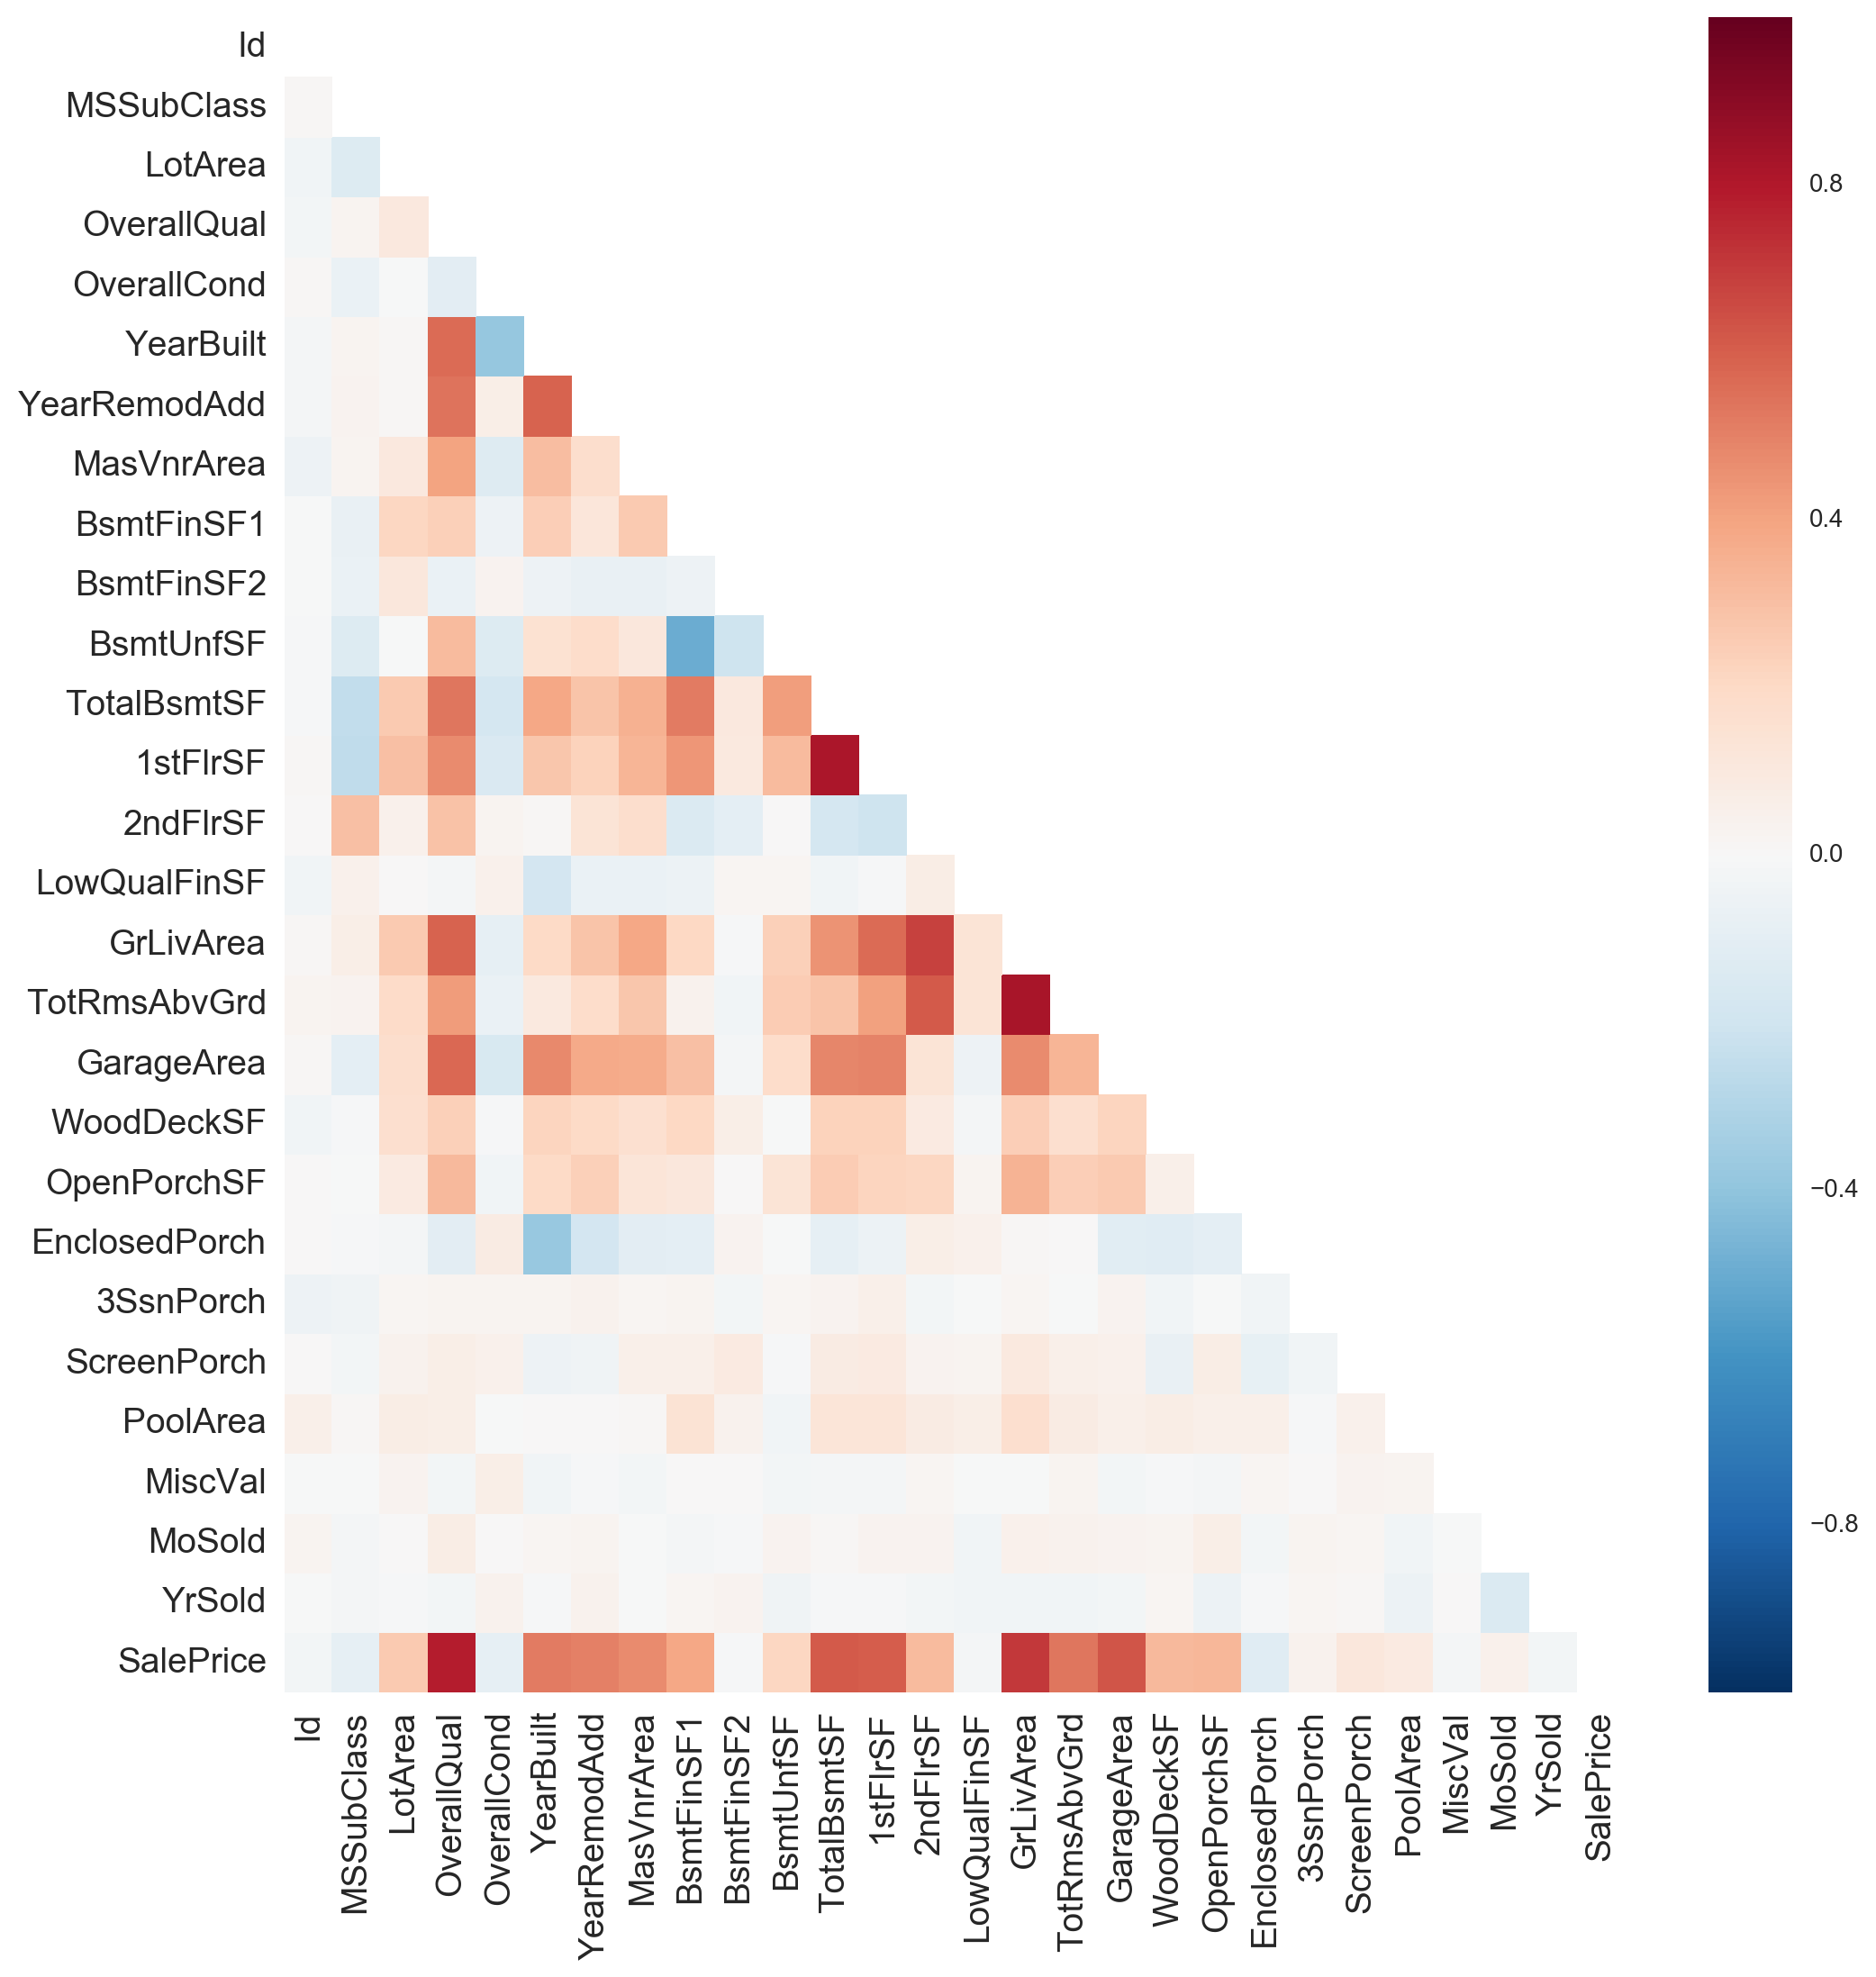

In [197]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(house)

In [ ]:
# a really few variables are strongly negatively correlated.
# regarding positive ones, here are the remarkable ones:

# Sale price is strongly correlated with 
# OverallQual
# GrLivArea (Above grade (ground) living area square feet)
# GarageArea

#loads of variables quantifying the living areas are strongly correlated:
#GrLivArea , TotRmsAbvGrd
#TotalBsmtSF , 1stFlrSF
#2ndFlrSF , GrLivArea


In [198]:
print "\n 10 most correlated variables are the following ones : \n\n",most_correlated_vars


 10 most correlated variables are the following ones : 

                       variables    coeffs
342      GarageCars , GarageArea  0.882475
159      YearBuilt , GarageYrBlt  0.825667
443     GrLivArea , TotRmsAbvGrd  0.825489
73        TotalBsmtSF , 1stFlrSF  0.819530
526      OverallQual , SalePrice  0.790982
30         GrLivArea , SalePrice  0.708624
525         2ndFlrSF , GrLivArea  0.687501
193  BedroomAbvGr , TotRmsAbvGrd  0.676620
398    BsmtFinSF1 , BsmtFullBath  0.649212
634   YearRemodAdd , GarageYrBlt  0.642277


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

In [236]:
house.corr().columns

corr_coeffs_SP3 = house.corr().SalePrice.reset_index().sort(columns='SalePrice', axis=0, ascending=False)
corr_coeffs_SP3.columns = ['var', 'coeff_SP*var']
corr_coeffs_SP3


/Users/medhimugnier/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,var,coeff_SP*var
27,SalePrice,1.000000
3,OverallQual,0.789031
15,GrLivArea,0.708658
17,GarageArea,0.629831
11,TotalBsmtSF,0.612088
12,1stFlrSF,0.603300
16,TotRmsAbvGrd,0.533355
5,YearBuilt,0.517602
6,YearRemodAdd,0.501186
7,MasVnrArea,0.471056


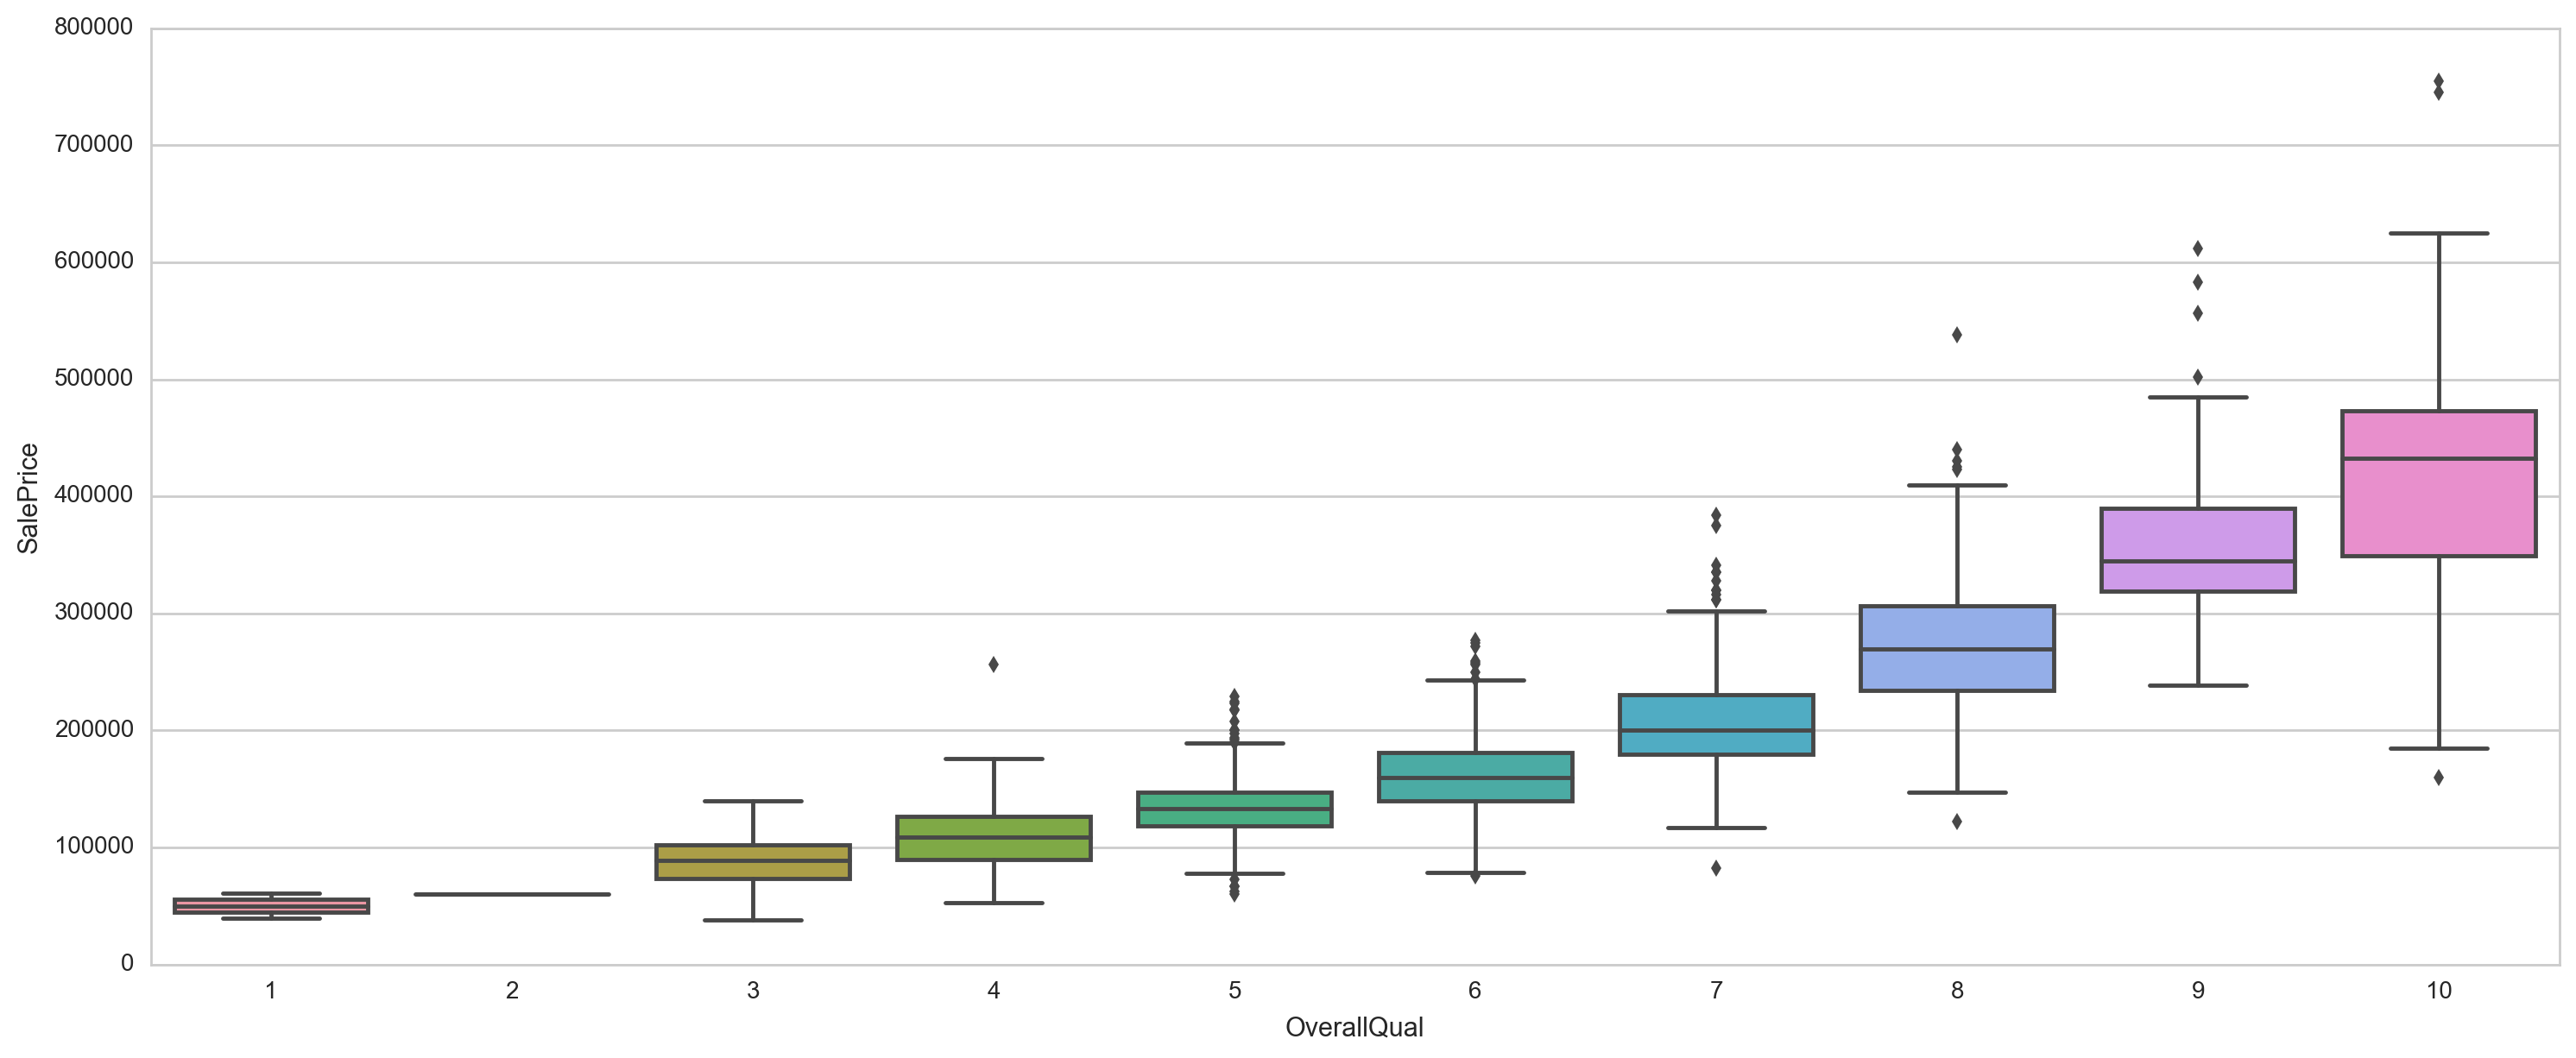

In [205]:
fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.boxplot(x="OverallQual", y="SalePrice", data=house, ax = axarr)
plt.show()

In [ ]:
# It looks like the higher the quality has been rated, the more variance there is in price, and the more outliers you'll find as well.
# It basically means that there are several types of "excellent" houses, and so different prices.
# Also, we clearly see a pretty intense linear correlation between these two variables.

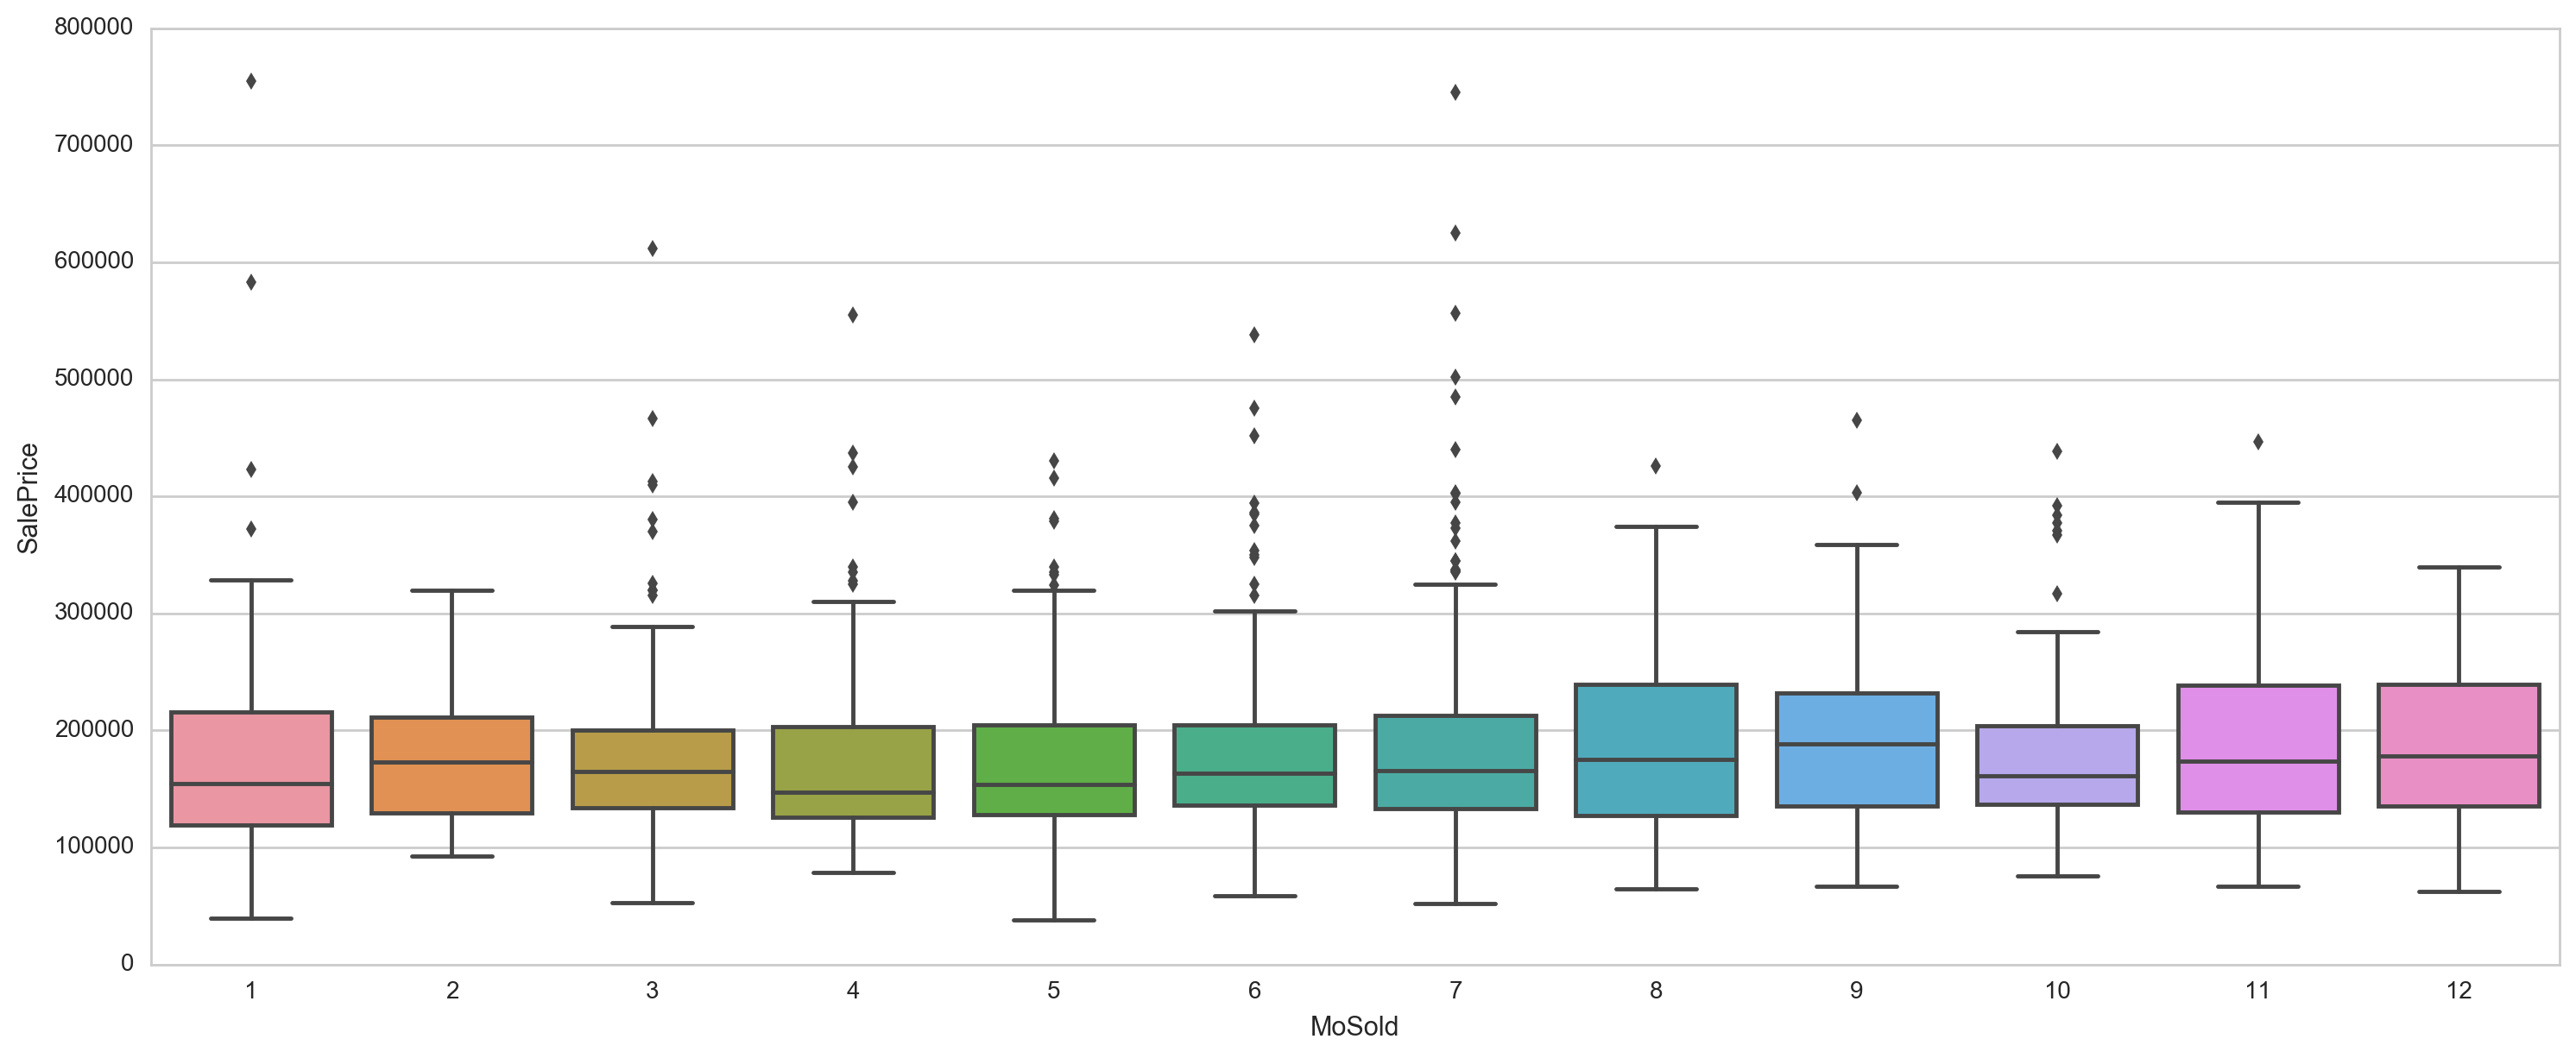

In [239]:
fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.boxplot(x="MoSold", y="SalePrice", data=house, ax = axarr)
plt.show()

In [240]:
# This is pretty interesting.
# it first shows a great seasonality in terms of Saleprice throughout the year (much more variations in the higher prices though).
# Summer and winter are definitely the periods during which prices increases, due to high demand.
# it's also the months during which we can see many outliers, in the highest prices.

In [250]:
# creating a new column "MSSubClass_renamed" in DataFrame house, that contains the description of each subclass (instead of an integer)

def subclass(v):
    if v == 20:
        return '1-STORY 1946 & NEWER ALL STYLES'
    elif v == 30:
        return '1-STORY 1945 & OLDER'
    elif v == 40:
        return '1-STORY W/FINISHED ATTIC ALL AGES'
    elif v == 45:
        return '1-1/2 STORY - UNFINISHED ALL AGES'
    elif v == 50:
        return '1-1/2 STORY FINISHED ALL AGES'
    elif v == 60:
        return '2-STORY 1946 & NEWER'
    elif v == 70:
        return '2-STORY 1945 & OLDER'
    elif v == 75:
        return '2-1/2 STORY ALL AGES'
    elif v == 80:
        return 'SPLIT OR MULTI-LEVEL'
    elif v == 85:
        return 'SPLIT FOYER'
    elif v == 90:
        return 'DUPLEX - ALL STYLES AND AGES'
    elif v == 120:
        return '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
    elif v == 150:
        return '1-1/2 STORY PUD - ALL AGES'
    elif v == 160:
        return '2-STORY PUD - 1946 & NEWER'
    elif v == 180:
        return 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
    elif v == 190:
        return '2 FAMILY CONVERSION - ALL STYLES AND AGES'
    else:
        return 'None'          

house.MSSubClass_renamed = house['MSSubClass'].map(lambda x:subclass(x))

array(['2-STORY 1946 & NEWER', '1-STORY 1946 & NEWER ALL STYLES',
       '2-STORY 1946 & NEWER', ..., '2-STORY 1945 & OLDER',
       '1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1946 & NEWER ALL STYLES'], dtype=object)

In [356]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,Na,NA,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,Na,NA,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,Na,NA,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,Na,NA,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,Na,NA,None,0,12,2008,WD,Normal,250000


In [364]:
# comparing YearBuilt and SalePrice
# resampling every 10 year between 1880 and 2010, to get a better rendering in the plotting

pt = house.pivot_table(index = ['YearBuilt','SalePrice']).reset_index()
decennial_SP = pt[['YearBuilt','SalePrice']][pt.YearBuilt.isin(np.arange(1880,2010,10))]



In [391]:
yearly_transactions = pt.YearBuilt.value_counts().reset_index()
yearly_transactions.columns = ['YearBuilt','nb_transactions']
yearly_transactions

pt = pt.merge(yearly_transactions,on = 'YearBuilt')
pt2 = pt[['YearBuilt','nb_transactions','SalePrice']]

,YearBuilt,SalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,GarageArea,...,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,YrSold,nb_transactions_x,nb_transactions_y,nb_transactions_x,nb_transactions_y,nb_transactions
0,1872,122000,938.0,1215.0,0.0,259.0,0.0,425.0,20.0,0.0,...,8.0,684.0,0.0,1987.0,2008.0,1,1,1,1,1
1,1875,94000,780.0,240.0,0.0,0.0,0.0,780.0,176.0,0.0,...,6.0,780.0,0.0,1996.0,2010.0,1,1,1,1,1
2,1880,117500,1178.0,1032.0,0.0,0.0,0.0,1008.0,0.0,205.0,...,8.0,1008.0,0.0,1950.0,2007.0,4,4,4,4,4
3,1880,124000,1089.0,661.0,0.0,0.0,0.0,636.0,293.0,240.0,...,8.0,636.0,0.0,1991.0,2006.0,4,4,4,4,4
4,1880,265979,1320.0,1320.0,0.0,0.0,0.0,1240.0,386.0,864.0,...,8.0,1240.0,181.0,2003.0,2009.0,4,4,4,4,4
5,1880,295000,1675.0,1818.0,0.0,0.0,0.0,1470.0,0.0,870.0,...,10.0,1470.0,302.0,2002.0,2008.0,4,4,4,4,4
6,1882,168000,916.0,826.0,0.0,216.0,0.0,700.0,0.0,424.0,...,8.0,916.0,0.0,1986.0,2009.0,1,1,1,1,1
7,1885,100000,1047.0,0.0,0.0,0.0,0.0,641.0,0.0,273.0,...,6.0,641.0,0.0,1995.0,2007.0,2,2,2,2,2
8,1885,122500,1246.0,1044.0,0.0,0.0,0.0,777.0,114.0,560.0,...,11.0,777.0,0.0,1950.0,2010.0,2,2,2,2,2
9,1890,124900,1188.0,561.0,0.0,1088.0,0.0,0.0,244.0,456.0,...,7.0,1088.0,48.0,1996.0,2009.0,2,2,2,2,2


In [392]:
pt2

,YearBuilt,nb_transactions,SalePrice
0,1872,1,122000
1,1875,1,94000
2,1880,4,117500
3,1880,4,124000
4,1880,4,265979
5,1880,4,295000
6,1882,1,168000
7,1885,2,100000
8,1885,2,122500
9,1890,2,124900


In [419]:
pt3 = pt2.groupby(['YearBuilt']).mean().reset_index()

In [429]:
pt3.head()

,YearBuilt,nb_transactions,SalePrice,Decennial
0,1872,1,122000,1870-1879
1,1875,1,94000,1870-1879
2,1880,4,200619,1880-1889
3,1882,1,168000,1880-1889
4,1885,2,111250,1880-1889


In [436]:
def decennial(x):
    dec_low = (x/10)*10
    dec_high = (x/10)*10+9
    return "%s-%s" %(dec_low,dec_high)



pt3['Decennial'] = pt3['YearBuilt'].map(lambda x: decennial(x))
pt4 = pt3.groupby(['Decennial'])[['SalePrice','YearBuilt']].aggfunc={'SalePrice':np.mean}


AttributeError: 'dict' object has no attribute 'reset_index'

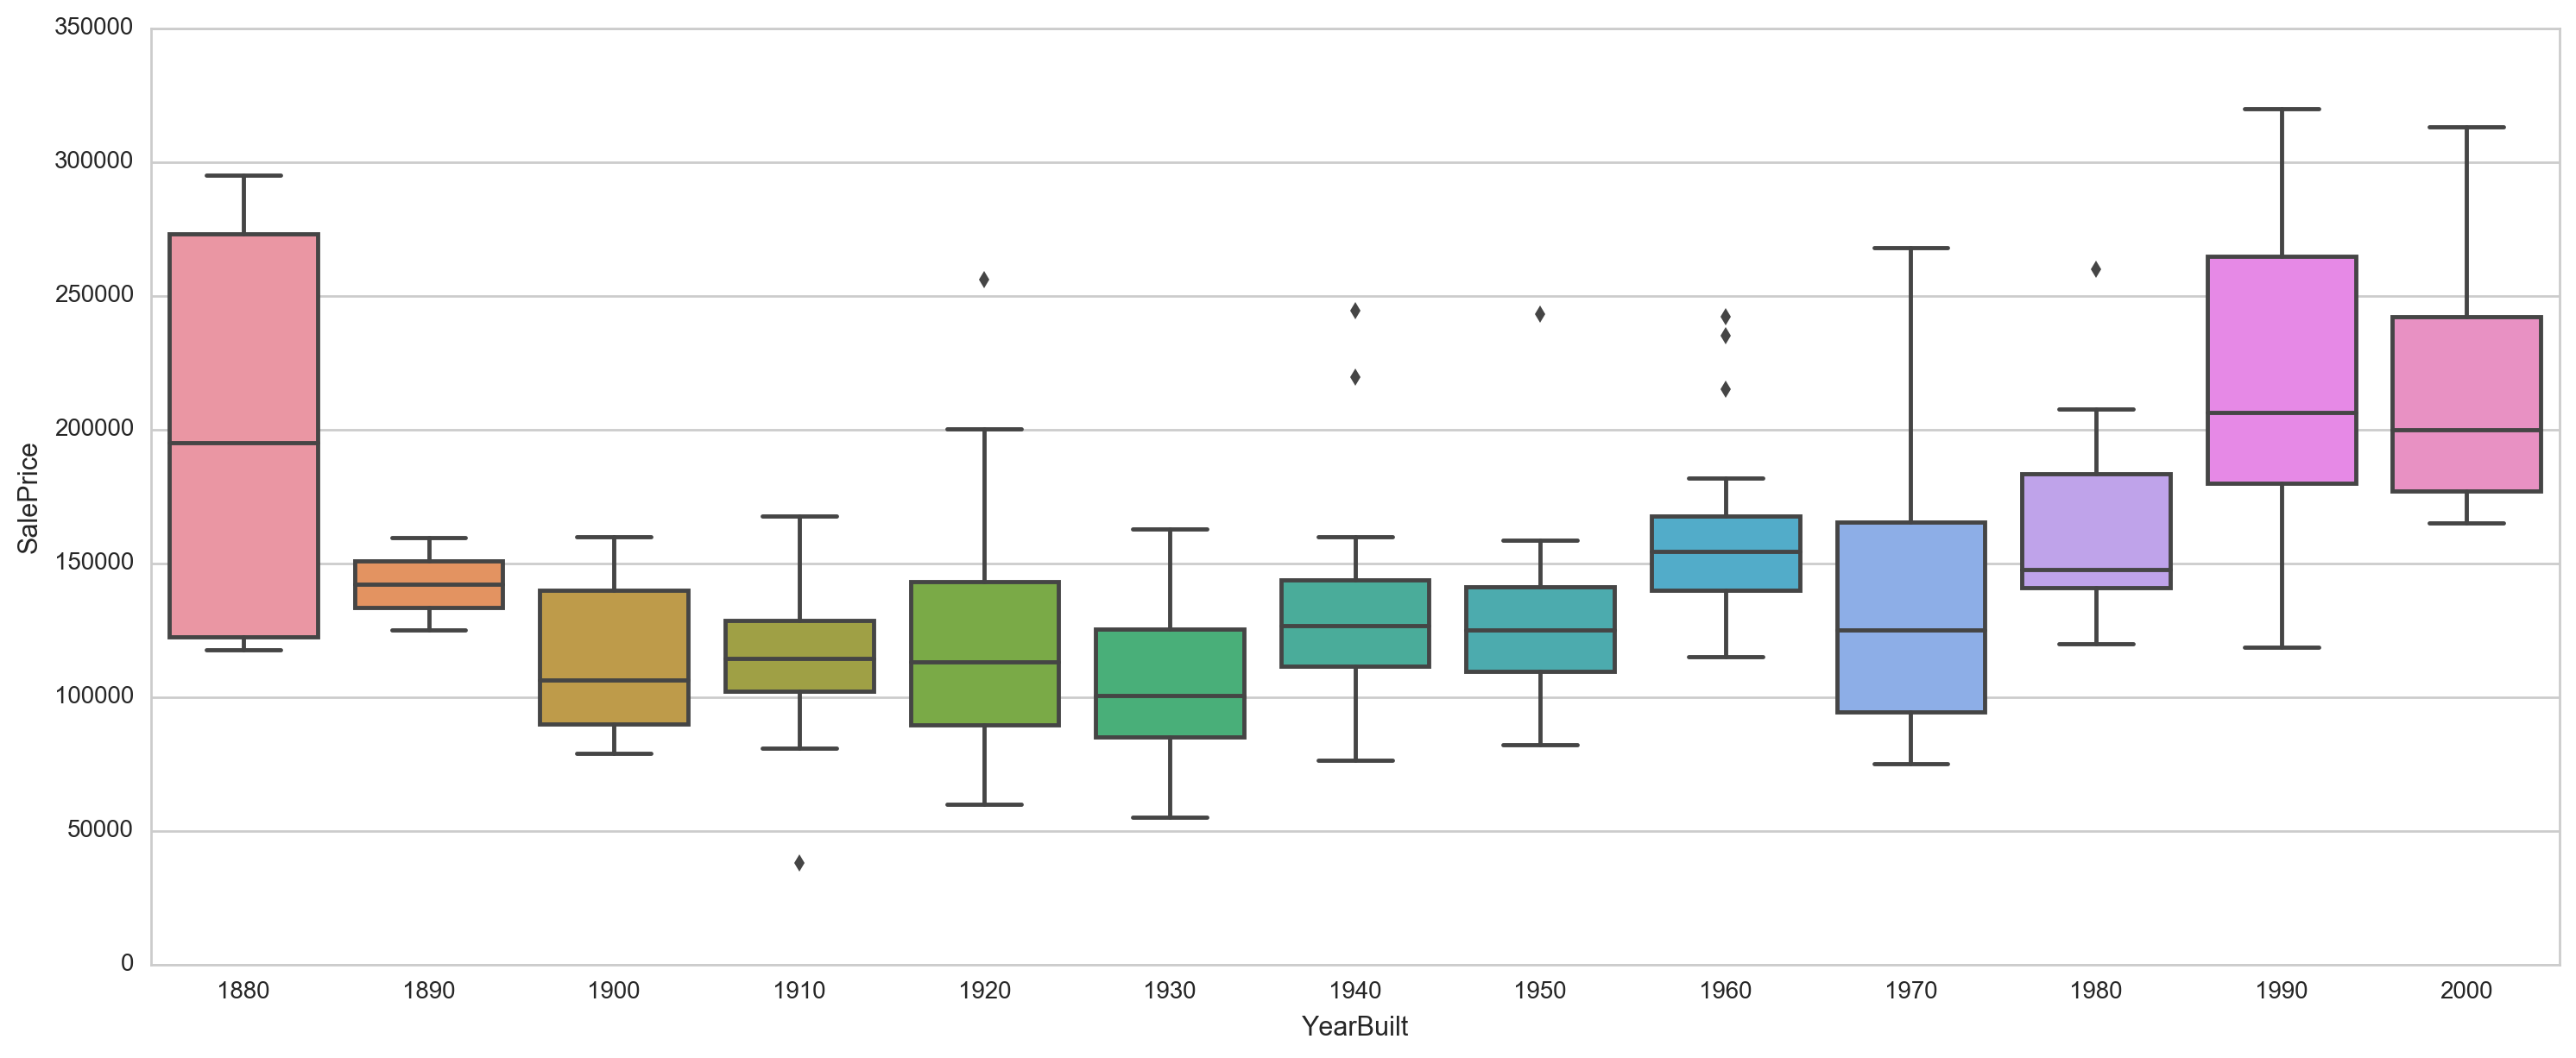

In [365]:
fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.boxplot(x="YearBuilt", y="SalePrice", data= decennial_SP , ax = axarr)
plt.show()

In [ ]:
# very interesting phenomenons here.
# as we could expect, really old houses as well as the newest ones tend to have a better SalePrice
# they also tend to have a more significant variance
# I should also put in evidence the number of transactions made on the same plot, as outliers might play a very important role here
# also, I should put all the values of the decennial (not only the decennials themselves)

In [ ]:
fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.boxplot(x="", y="SalePrice", data=house, ax = axarr)
plt.show()

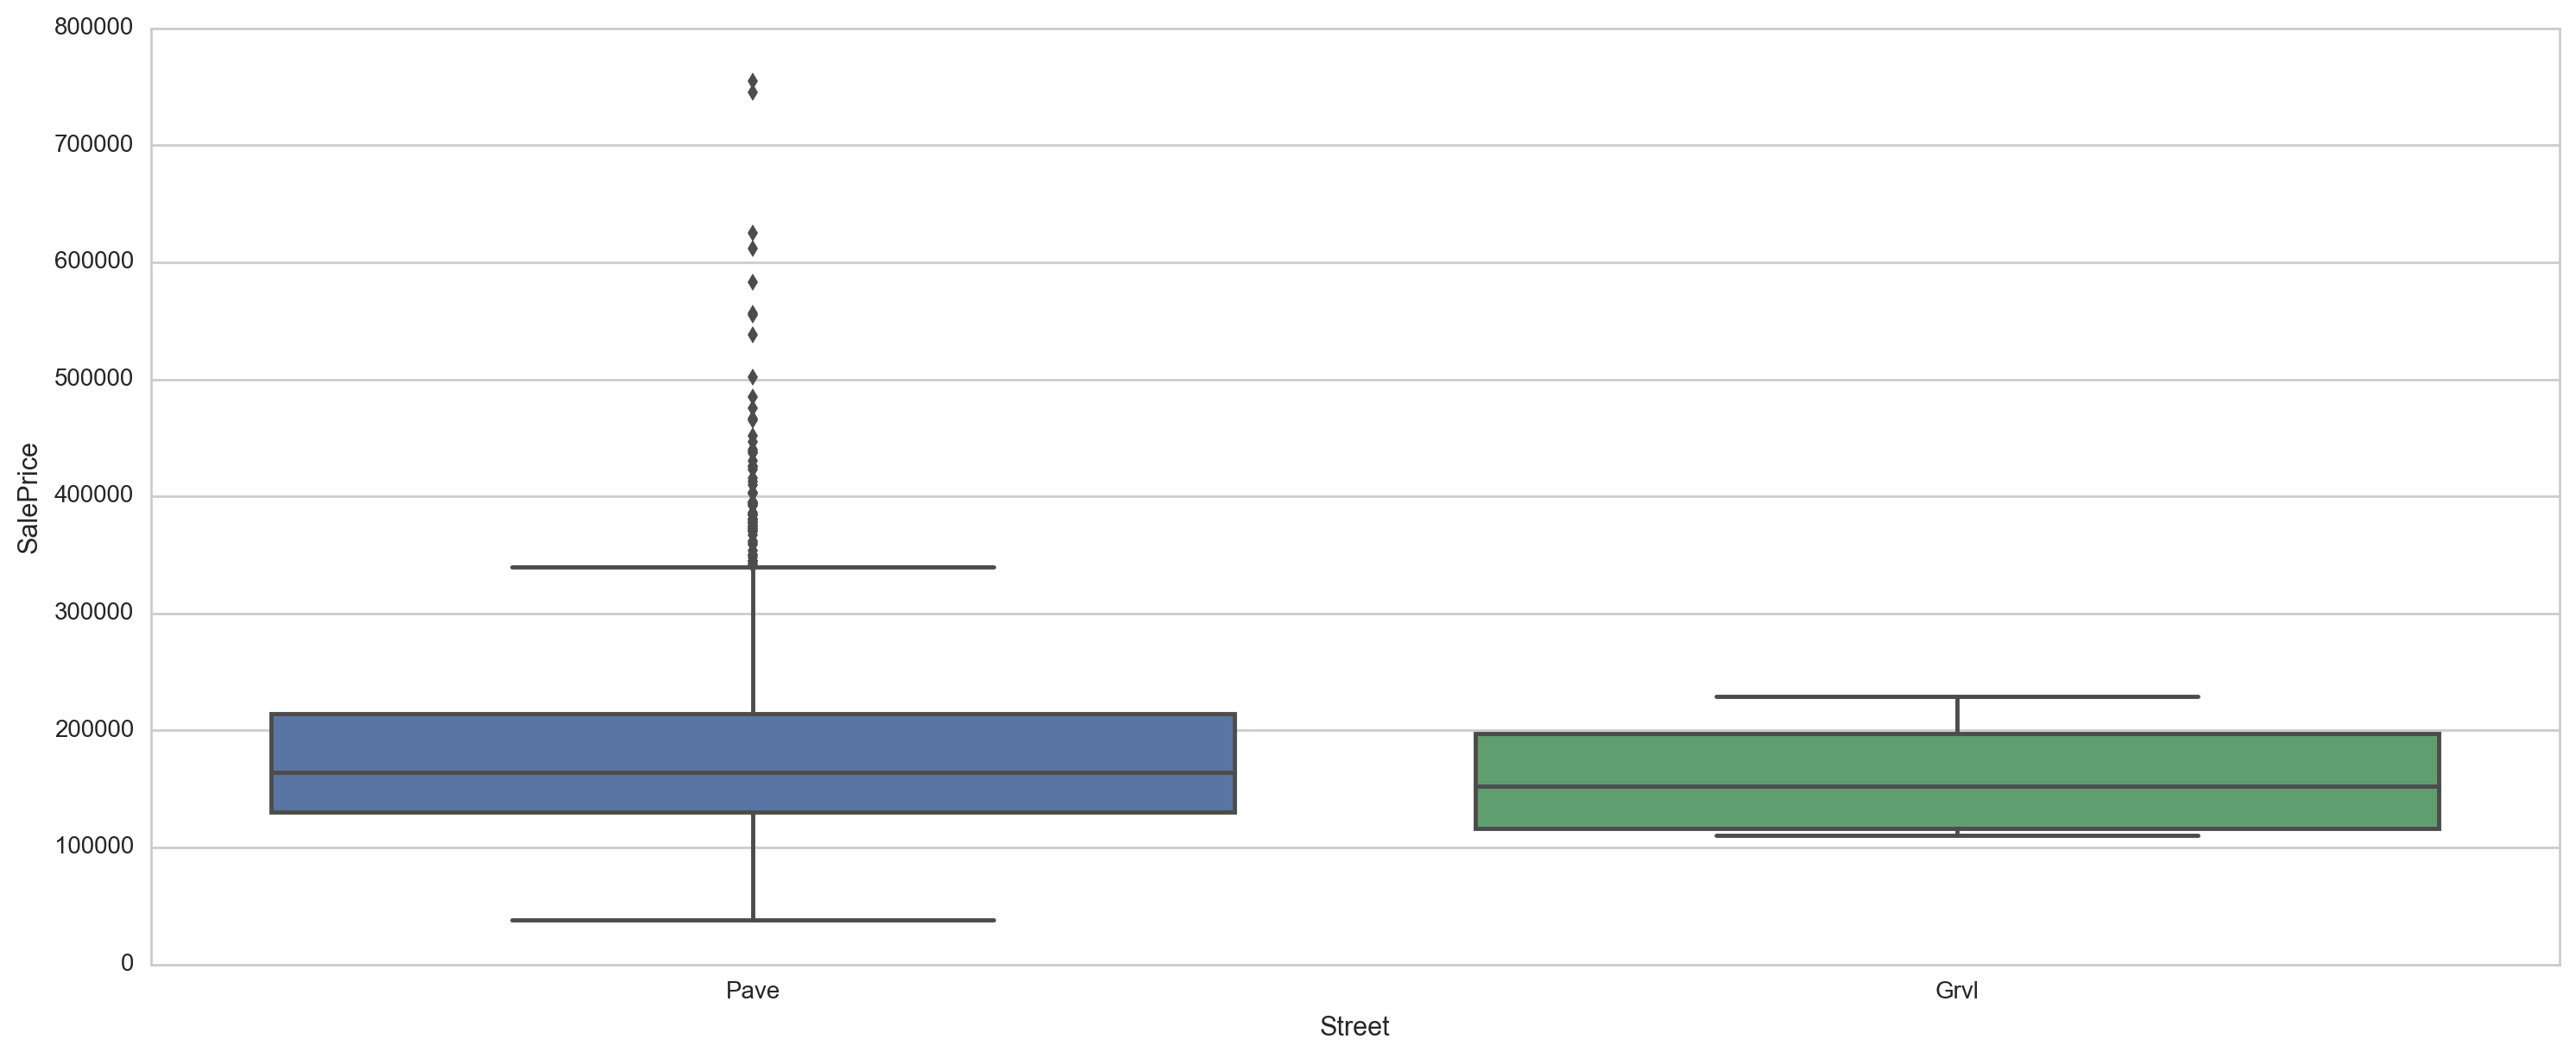

In [438]:
fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.boxplot(x="Street", y="SalePrice", data=house, ax = axarr)
plt.show()

# paving the access road has a really significant impact on the house SalePrice.

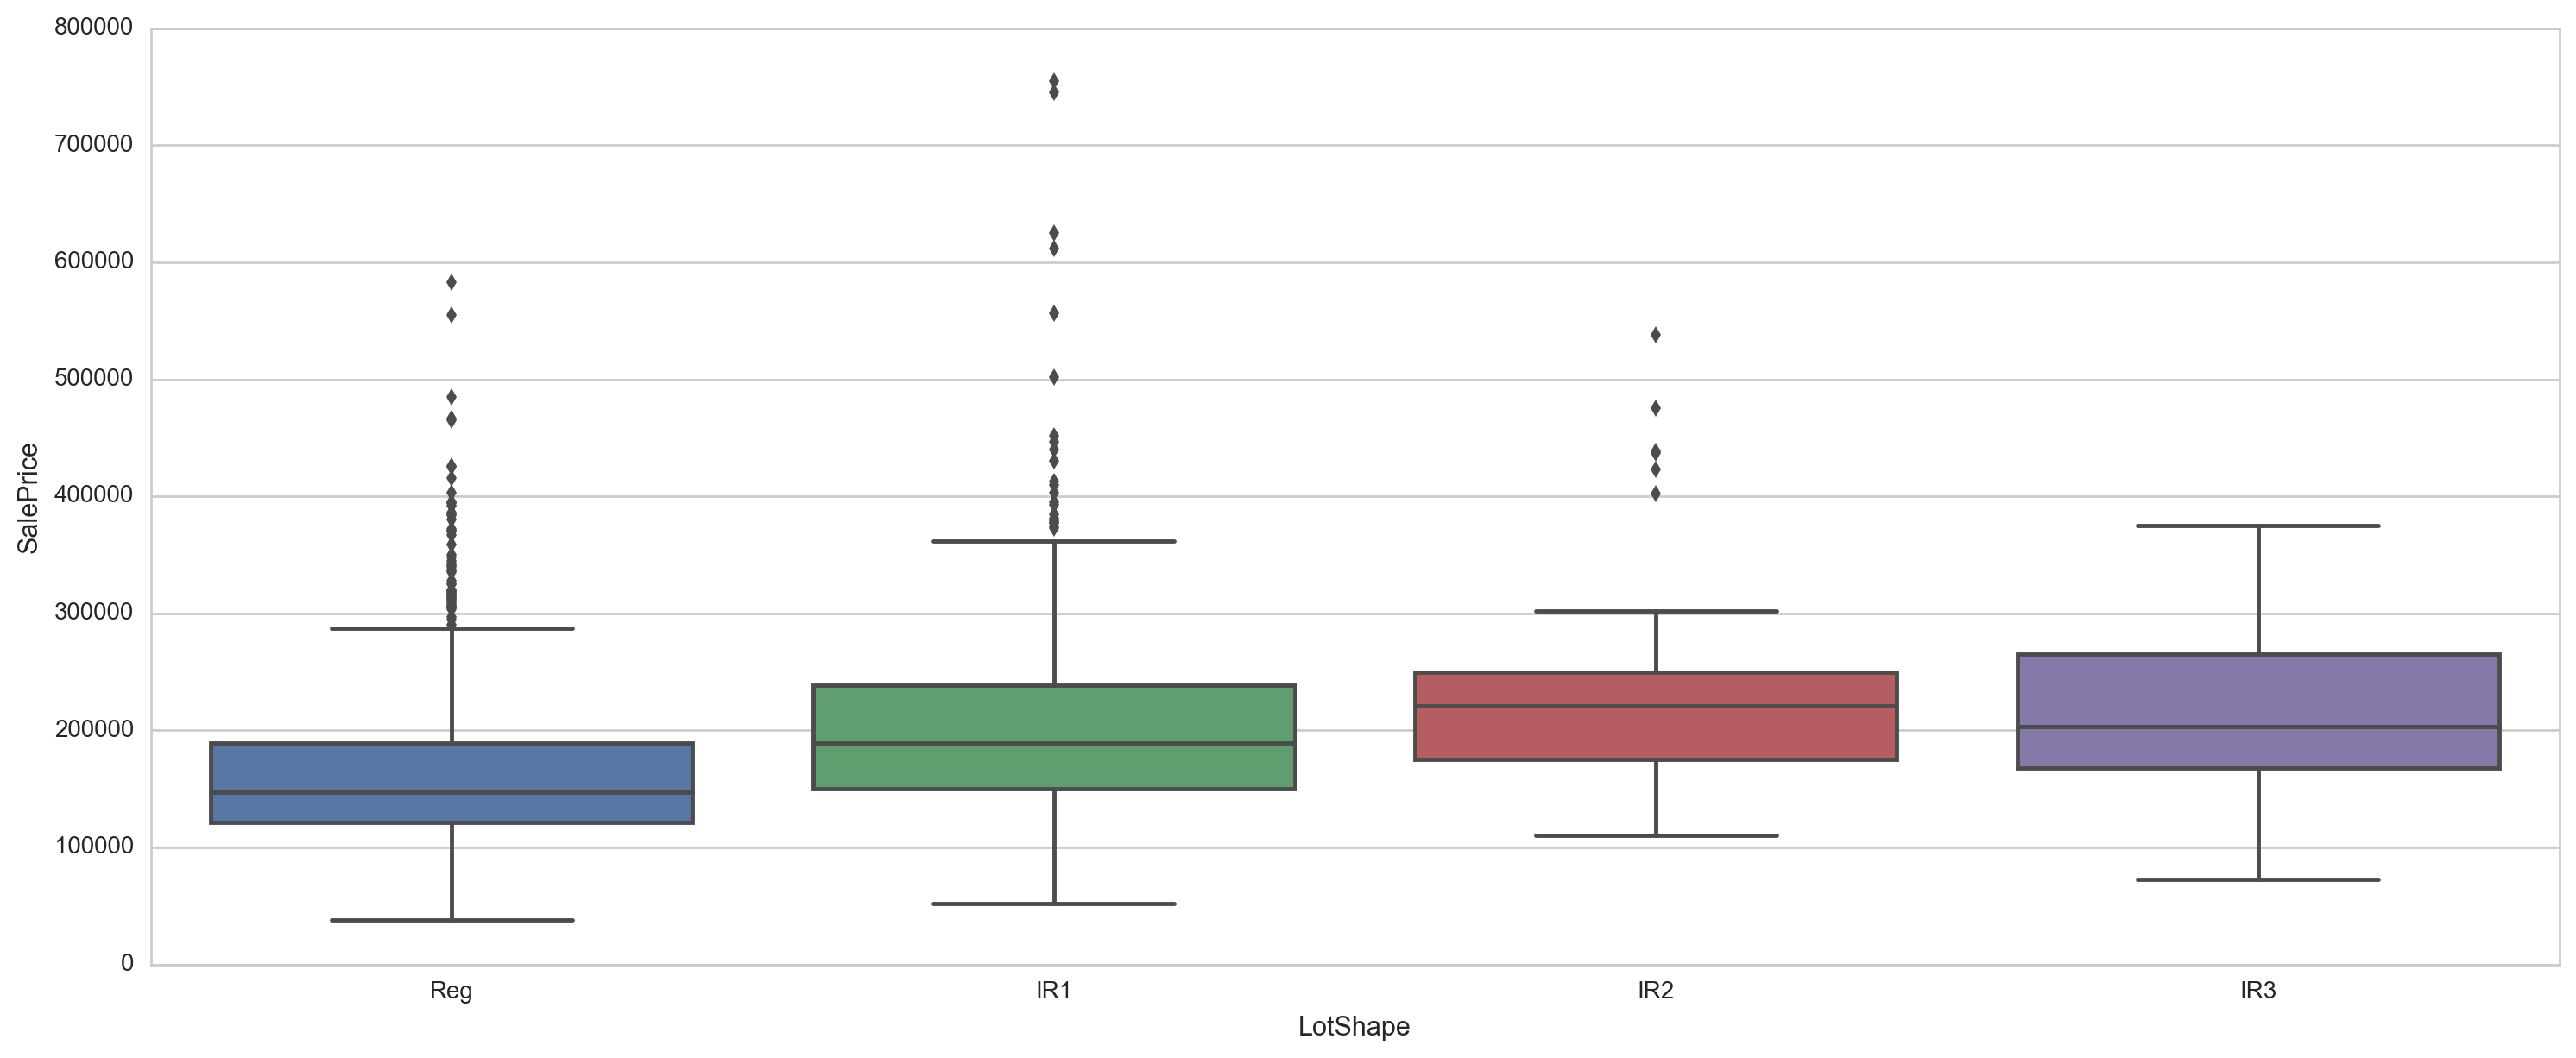

In [441]:
fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.boxplot(x="LotShape", y="SalePrice", data=house, ax = axarr)
plt.show()

# If a house's shape is Regular, this house will tend to have a lower SalePrice.
# It usually means it's been part of a a bigger real estate project, where many neighbours own the same house formfactor.

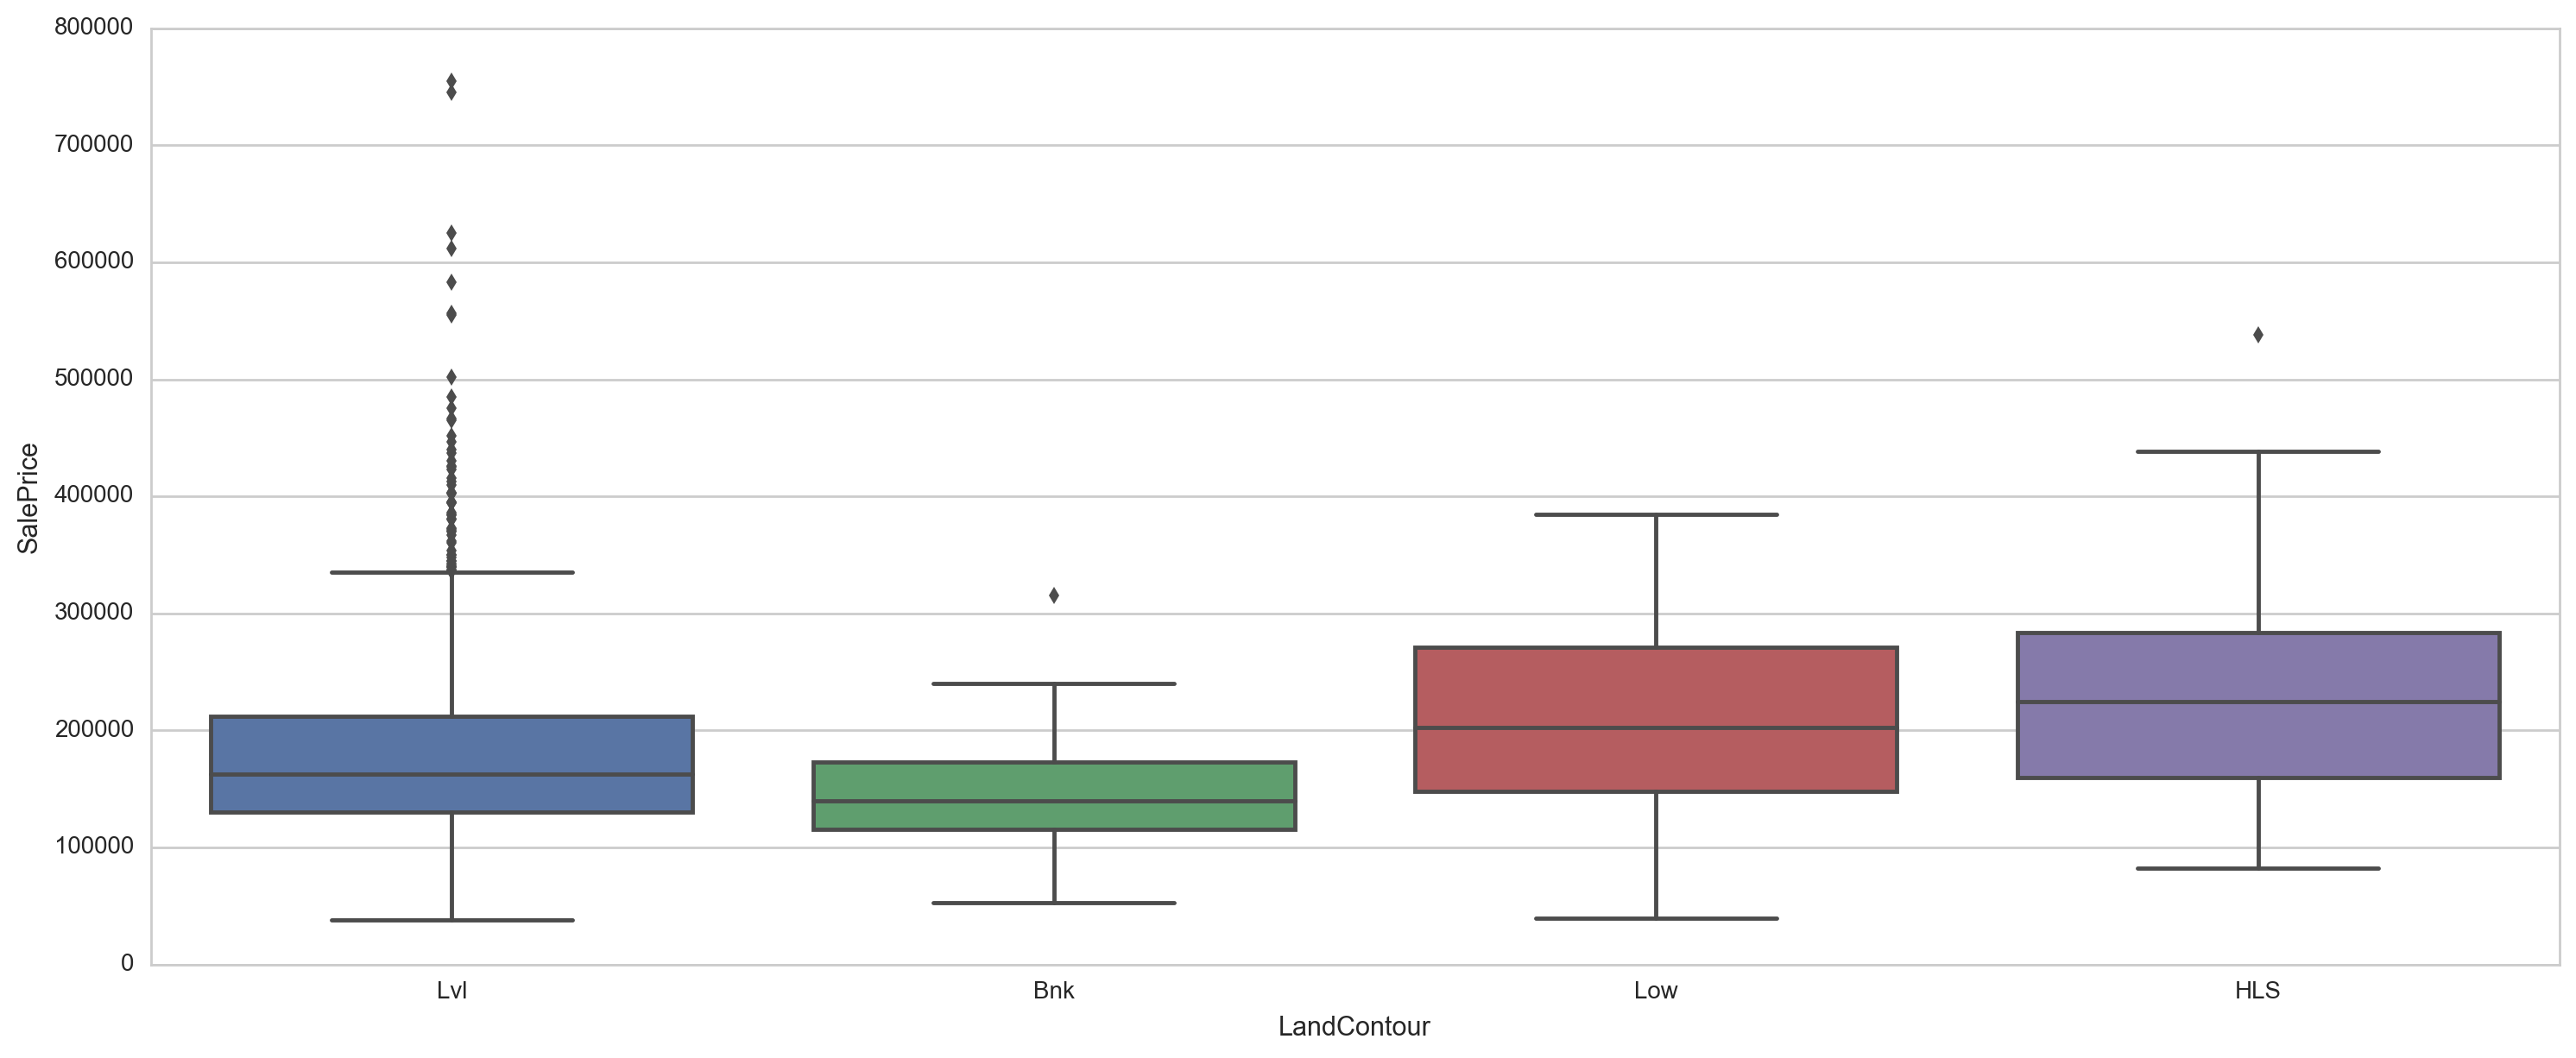

In [443]:
fig, axarr = plt.subplots(1,1, figsize = (18,7))
axarr = sns.boxplot(x="LandContour", y="SalePrice", data=house, ax = axarr)
plt.show()

# Generally speaking, the house on hills offer a better view, and thus tend to have higher SalePrice (30 to $50K more on average).

In [203]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,Na,NA,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,Na,NA,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,Na,NA,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,Na,NA,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,Na,NA,None,0,12,2008,WD,Normal,250000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


In [451]:
#model = sm.formula.ols(formula="Saleprice ~ GrLivArea -1", data=house)
#results = model.fit()

import statsmodels.formula.api as smf
lm = smf.ols(formula='SalePrice ~ GrLivArea', data=house).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1461.
Date:                Sun, 04 Dec 2016   Prob (F-statistic):          1.38e-221
Time:                        13:27:11   Log-Likelihood:                -17906.
No. Observations:                1450   AIC:                         3.582e+04
Df Residuals:                    1448   BIC:                         3.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    1.95e+04   4489.318      4.344      0.000      1.07e+04  2.83e+04
GrLivArea    106.8430      2.795     38.220      0.000       101.359   112.327
==============================================================================
Omnibus:                      264.844   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3531.303
Skew:                           0.426   Prob(JB):                         0.00
Kurtosis:                      10.598   Cond. No.                     4.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [455]:
house[['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
5,1362,143000
6,1694,307000
7,2090,200000
8,1774,129900
9,1077,118000


### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

In [ ]:
#1. The intercept coefficient.
# it's a correction factor that helps reducing the mean squared errors. Basically, it will adjust the regression linear function so that it's applicable to several samples (adjusts for the bias and variance).
# it also defines a floor value, here $19,500, that is independant from the Area value.

#2. The coefficient on GrLivArea 
# it represents the mean change in the SalePrice for one Sqft. Here, it means that for every additional squarefeet, the price will increase on average by $106. 

#3. The R-squared value.
# it's a measurement of how well your model predicts your target values.

#4. The p-value for coefficients (P>|t|
# assuming that the Ground Live Area had no effect on the SalePrice, we would
# obtain our observation difference or more in P-value = 0;01% of studies due to random sampling error.

In [452]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,Na,NA,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,Na,NA,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,Na,NA,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,Na,NA,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,Na,NA,None,0,12,2008,WD,Normal,250000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

In [462]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()

X = house[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',]]
y = house.SalePrice

print X.shape
print y.shape


(1450, 20)
(1450,)


In [496]:
y = pd.DataFrame(y)
X.LotFrontage.replace('NA',0, inplace = True)

model = lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 8.2 Calculate the $R^2$ of your model.

In [495]:
R_squared = model.score(X,y)
print 'R_squared = ',R_squared

R_squared =  0.69545311715


### 8.3 Plot the residuals against the true values.

In [510]:
# let's build a dataframe containing:
# the predictors
# the target
# the predictions
# the residuals

predictions = model.predict(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [509]:
compared = X
compared['y'] = y
compared['y_hat']= predictions
compared['residuals'] = compared['y_hat'] - compared['y']
compared



/Users/medhimugnier/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/medhimugnier/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/medhimugnier/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,y,y_hat,residuals
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,61,0,0,0,0,0,208500.0,198543.257121,-9956.742879
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,298,0,0,0,0,0,0,181500.0,183388.836199,1888.836199
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,42,0,0,0,0,0,223500.0,207768.680502,-15731.319498
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,35,272,0,0,0,0,140000.0,172897.339103,32897.339103
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,192,84,0,0,0,0,0,250000.0,283812.391627,33812.391627
5,85.0,14115,0.0,732,0,64,796,796,566,0,...,40,30,0,320,0,0,700,143000.0,178266.627617,35266.627617
6,75.0,10084,186.0,1369,0,317,1686,1694,0,0,...,255,57,0,0,0,0,0,307000.0,253331.653048,-53668.346952
7,0.0,10382,240.0,859,32,216,1107,1107,983,0,...,235,204,228,0,0,0,350,200000.0,235891.452252,35891.452252
8,51.0,6120,0.0,0,0,952,952,1022,752,0,...,90,0,205,0,0,0,0,129900.0,171603.450579,41703.450579
9,50.0,7420,0.0,851,0,140,991,1077,0,0,...,0,4,0,0,0,0,0,118000.0,121544.652220,3544.652220


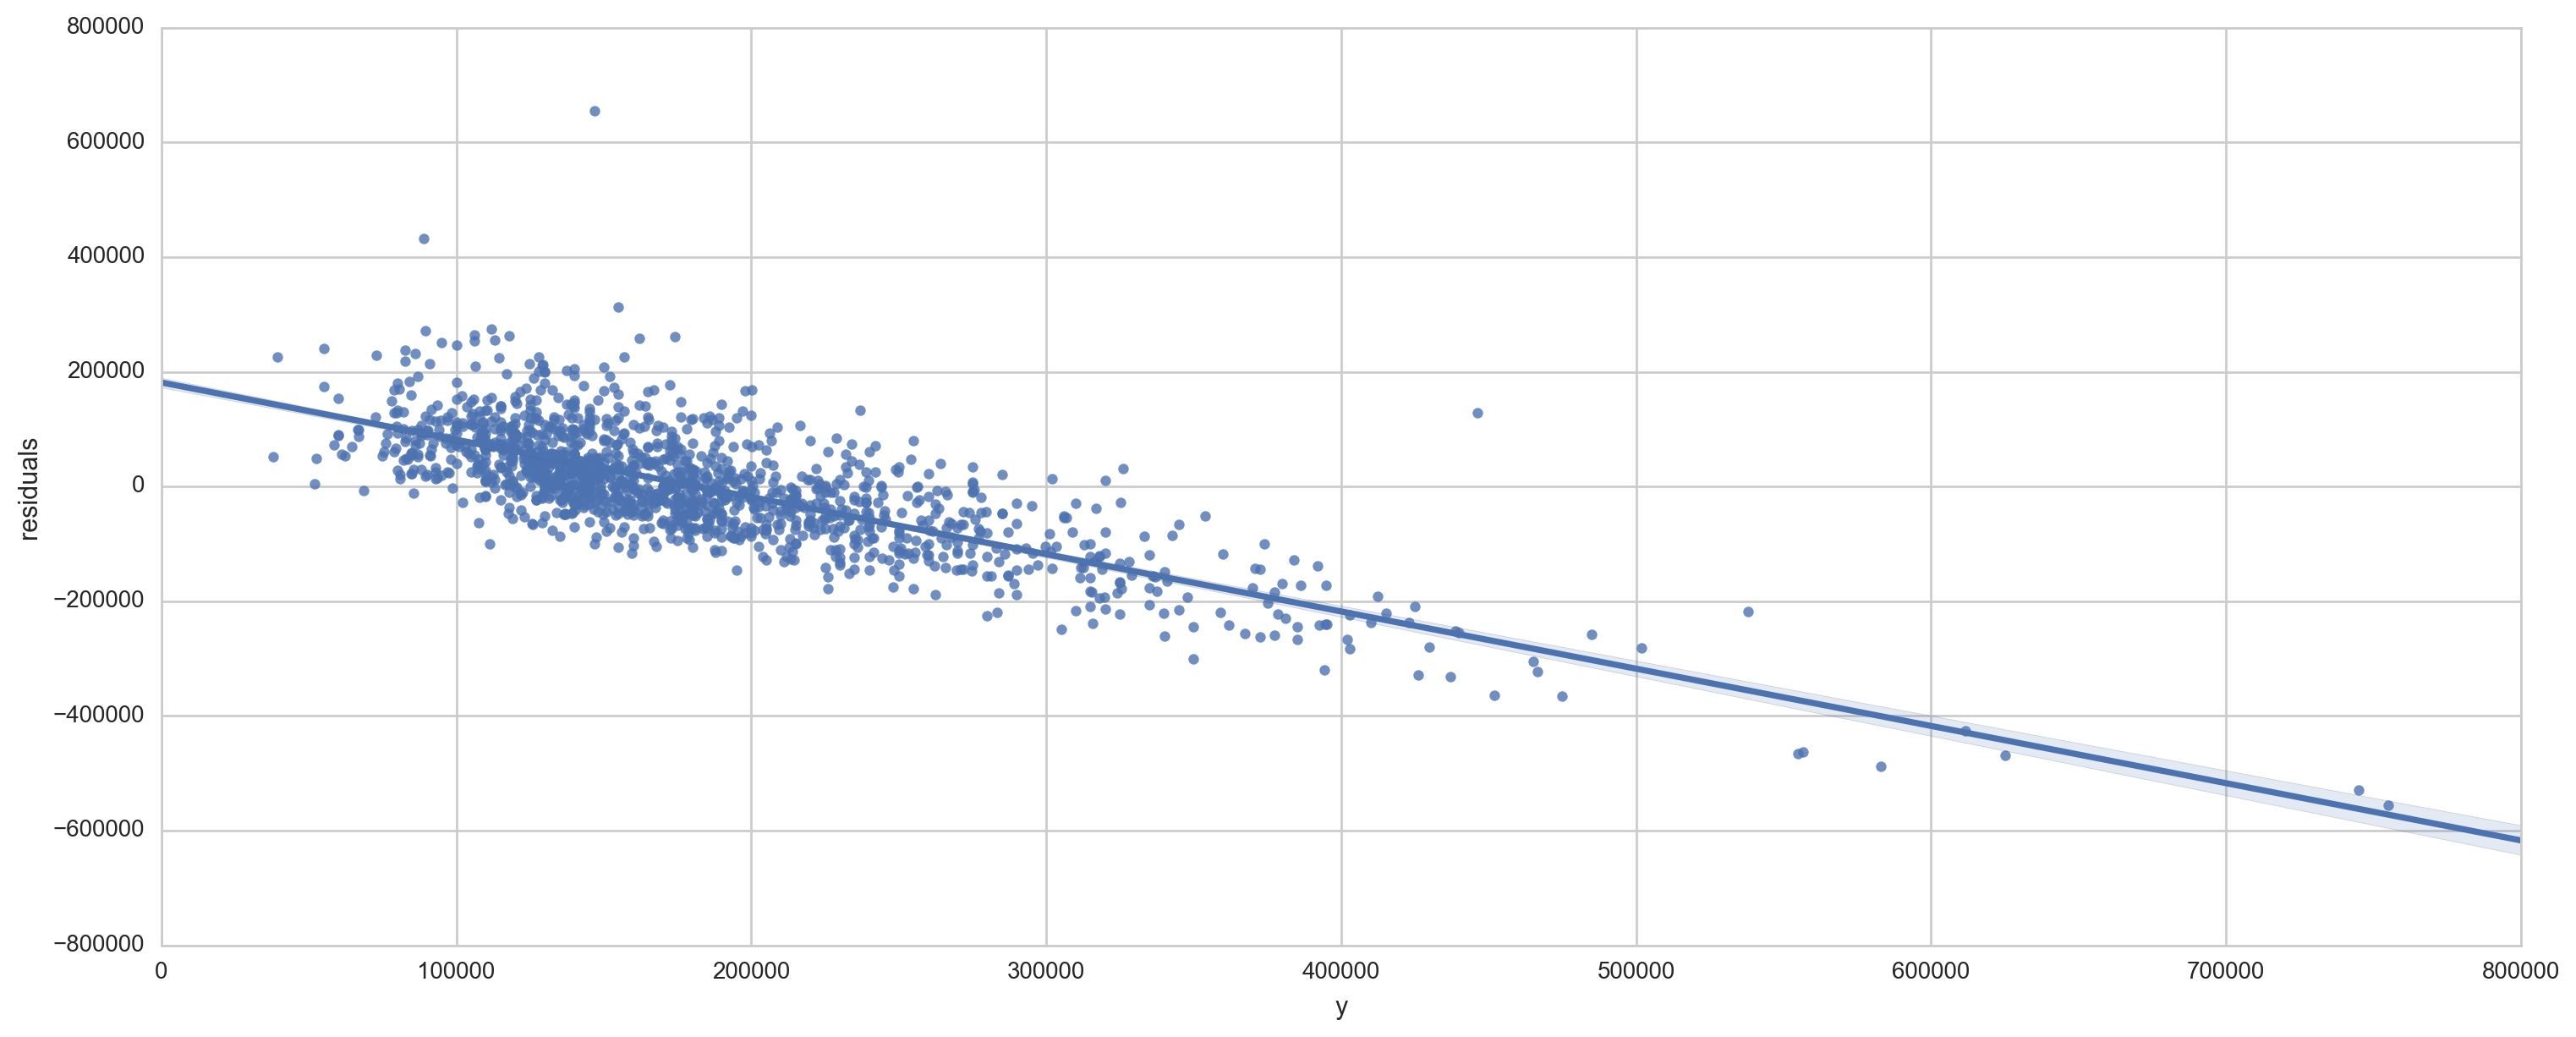

In [514]:
fig, axarr = plt.subplots(1,1, figsize = (18,7))

axarr = sns.regplot(x='y',y='residuals',ax = axarr, data = compared)

In [515]:
# the residuals follow a trend, and so are very predictable. This suggest that my model is not good at all.
# indeed, all that is predictable should go to the predictable part (= predictors).
# we have to adjust the model by either:

# assessing impact of an outlier
# transforming variable
# adding a new variable
# change from linear to polynomial regression


### 8.4 Plot a histogram of the residuals.

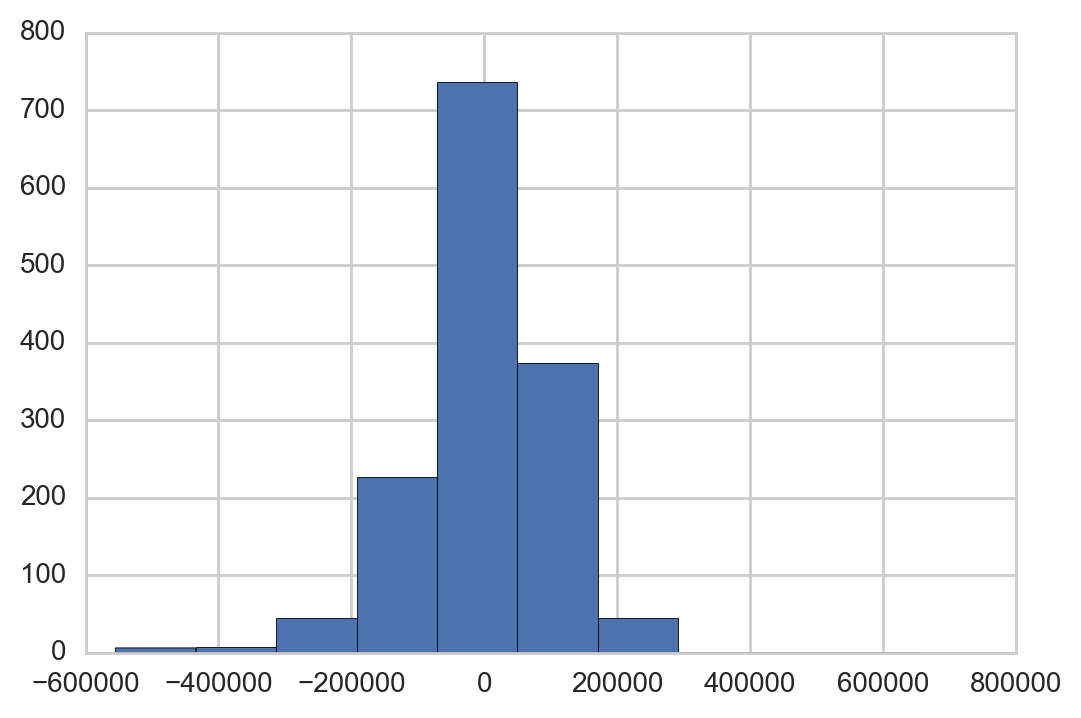

In [516]:
compared.residuals.hist()

In [ ]:
#this shows a nice bell and thus confirms that our errors are not randomly distributed as it's supposed to be

### 8.5 Make a plot to show the strength of the different coefficients.

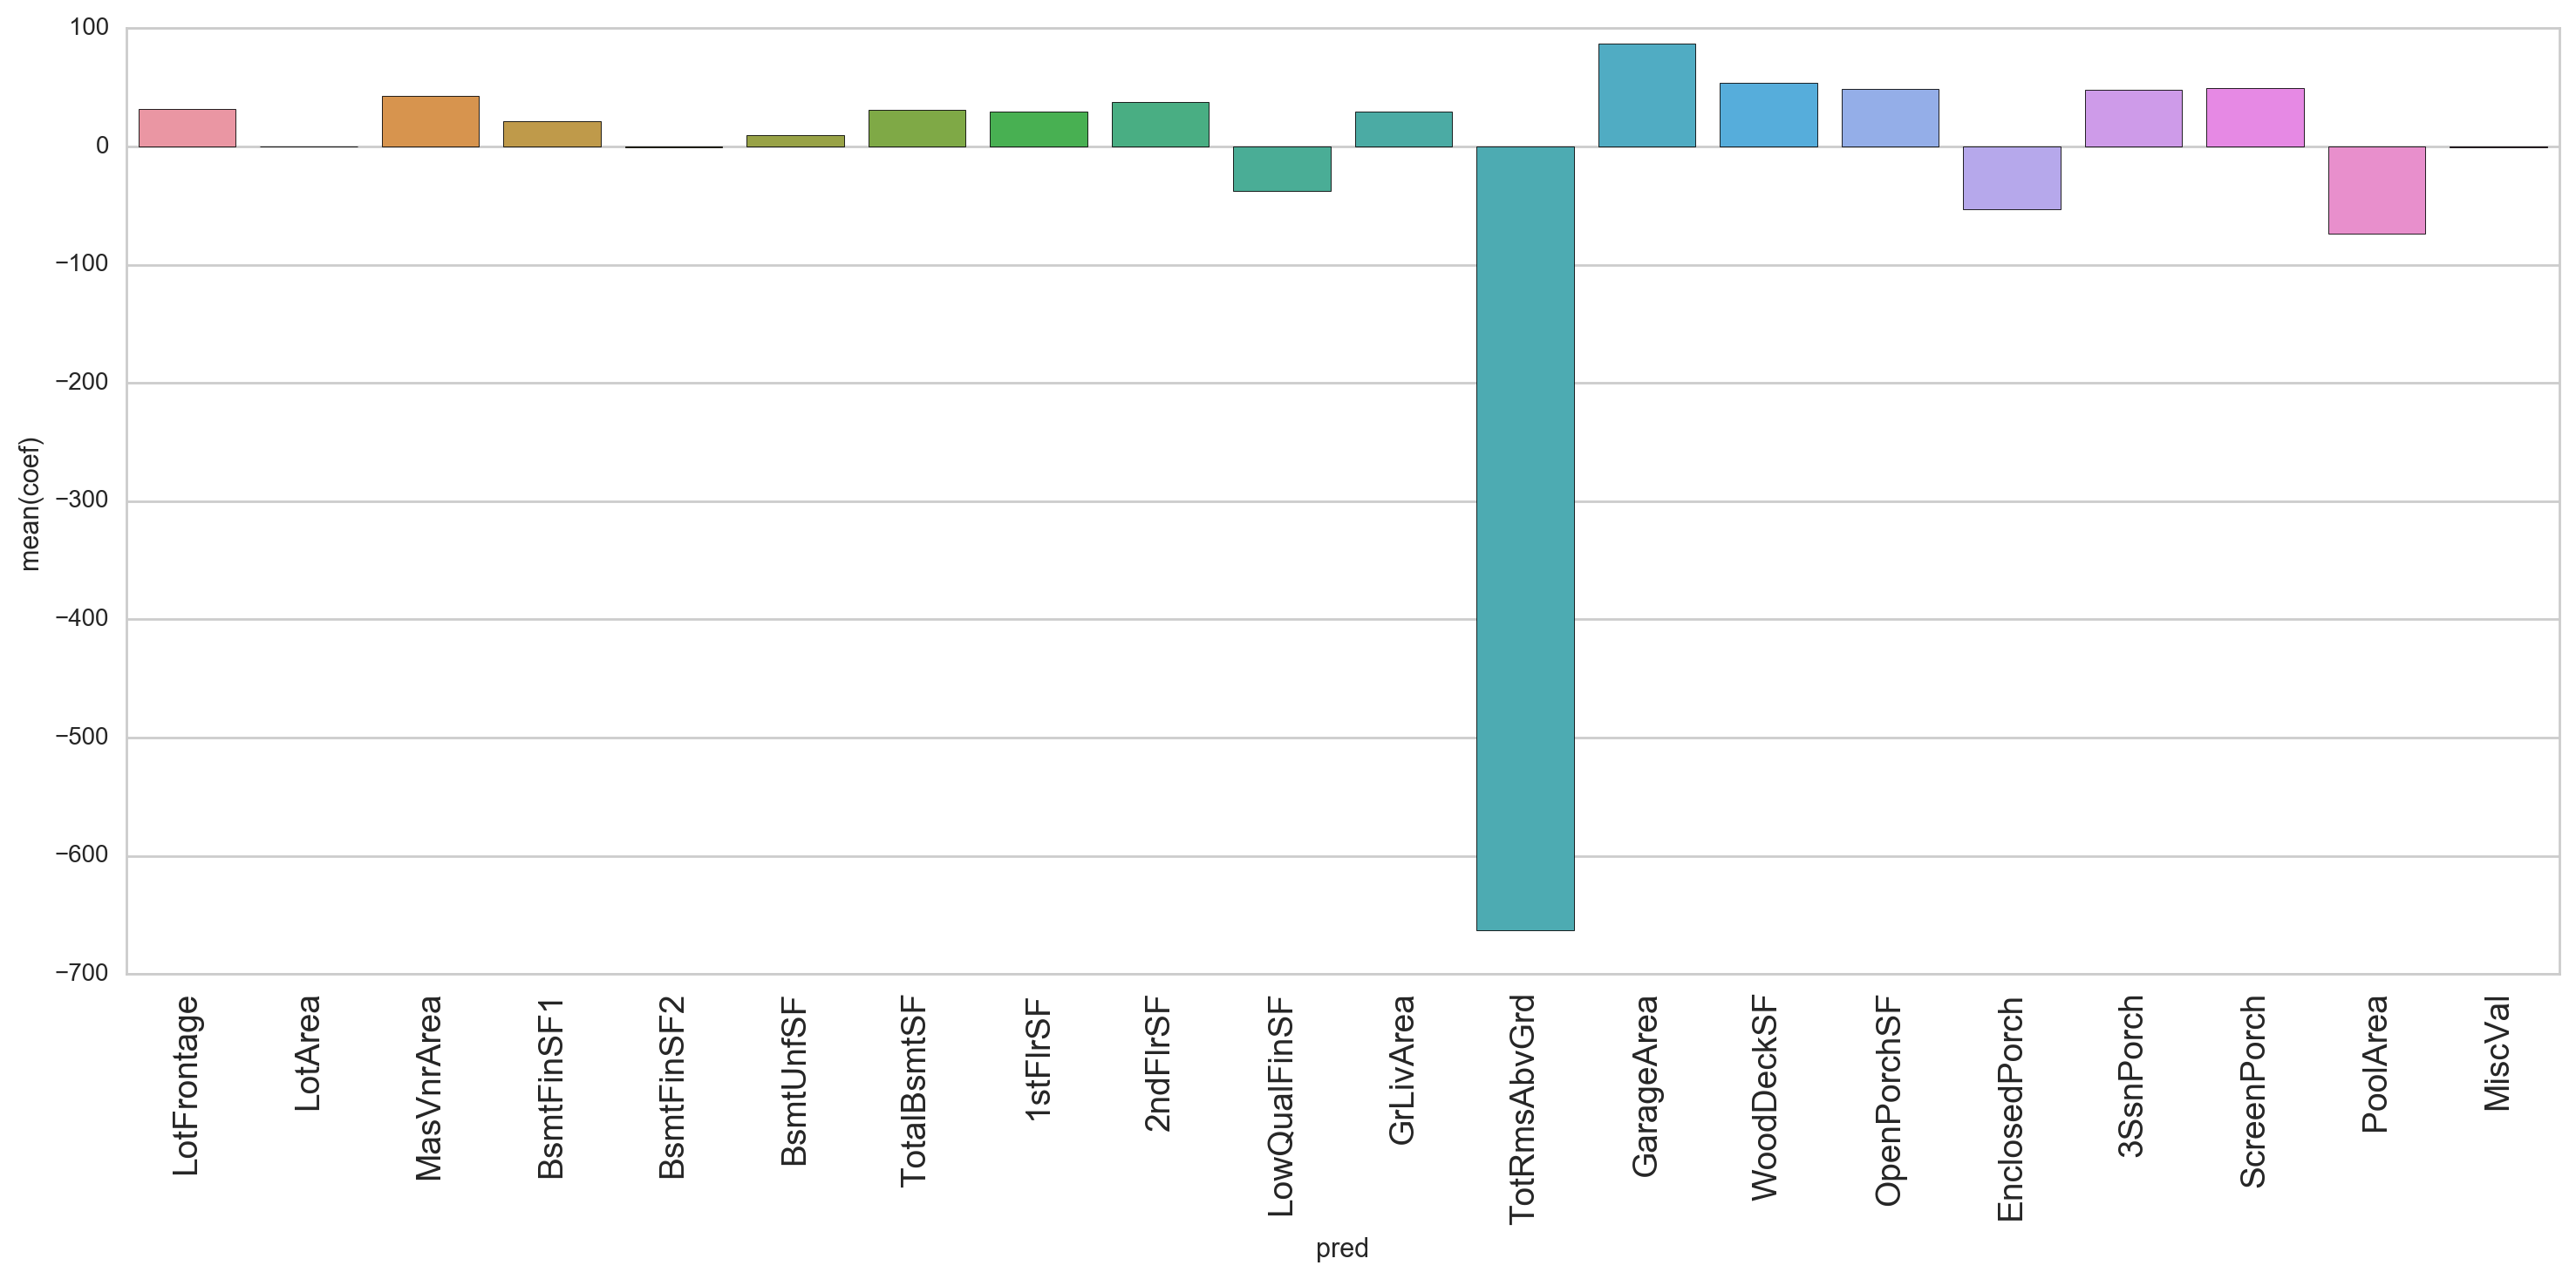

In [565]:
coefs = pd.DataFrame(model.coef_)
coefs

coefs.columns = X.columns


fig, ax = plt.subplots(1,1, figsize = (18,7))

ax = sns.barplot(x = 'pred', y = 'coef',ax = ax,data = coefs_t)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)


In [ ]:
# seems like the total number of rooms account for a great part of the SalePrice

In [562]:
coefs_t = coefs.T.reset_index()
coefs_t.columns = ('pred','coef')
coefs_t

,pred,coef
0,LotFrontage,31.858668
1,LotArea,0.165425
2,MasVnrArea,42.911702
3,BsmtFinSF1,21.437303
4,BsmtFinSF2,-0.406011
5,BsmtUnfSF,9.581550
6,TotalBsmtSF,30.612841
7,1stFlrSF,29.166081
8,2ndFlrSF,37.918412
9,LowQualFinSF,-37.738798


In [545]:
#del X['y']
del X['y_hat']
#del X['residuals']
X


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,8,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,6,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,6,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,7,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,9,836,192,84,0,0,0,0,0
5,85.0,14115,0.0,732,0,64,796,796,566,0,1362,5,480,40,30,0,320,0,0,700
6,75.0,10084,186.0,1369,0,317,1686,1694,0,0,1694,7,636,255,57,0,0,0,0,0
7,0.0,10382,240.0,859,32,216,1107,1107,983,0,2090,7,484,235,204,228,0,0,0,350
8,51.0,6120,0.0,0,0,952,952,1022,752,0,1774,8,468,90,0,205,0,0,0,0
9,50.0,7420,0.0,851,0,140,991,1077,0,0,1077,5,205,0,4,0,0,0,0,0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which sklearn may have trouble with.)

In [581]:
columns_values = list(house.columns.values)

def contains_digit(inputString):
        return any(char.isdigit() for char in inputString)

    
for item in columns_values:
    if contains_digit(item):
        print item

rename_map = {
    'Condition1': 'Conditionone',
    'Condition2':'Conditiontwo',
    'Exterior1st': 'Exteriorfirst',
    'Exterior2nd':'Exteriorsecond',
    'BsmtFinType1': 'BsmtFinTypeone',
    'BsmtFinSF1':'BsmtFinSFone',
    'BsmtFinType2': 'BsmtFinTypetwo',
    '1stFlrSF': 'firstFlrSF',
    '2ndFlrSF': 'secondFlrSF',
    '3SsnPorch': 'threeSsnPorch',
    }


house.rename(columns=rename_map, inplace=True)


Condition1
Condition2
Exterior1st
Exterior2nd
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
1stFlrSF
2ndFlrSF
3SsnPorch


In [582]:
house.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Conditionone', 'Conditiontwo',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exteriorfirst',
       'Exteriorsecond', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinTypeone', 'BsmtFinSFone', 'BsmtFinTypetwo', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'firstFlrSF', 'secondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'threeSsnPorch',
       'ScreenPorch', 'PoolAre

In [612]:
import patsy
from sklearn.linear_model import LinearRegression

X_bis = house[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Conditionone', 'Conditiontwo',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exteriorfirst',
       'Exteriorsecond', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinTypeone', 'BsmtFinSFone', 'BsmtFinTypetwo', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'firstFlrSF', 'secondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'threeSsnPorch',
       'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

formula="SalePrice ~ %s -1" %('+'.join(X_bis.columns.values))
y, X     =  patsy.dmatrices(formula, data=house, return_type="dataframe")


lm = LinearRegression()
model = lm.fit(X, y)

model.score(X,y)


1.0

### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

In [ ]:
#This score of 1 might just be the result of an overfitting phenomenon, meaning there are too many predictors in our model.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

In [616]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model, X  , y, cv=20)
print "Average cross-validated scores:", scores.mean()





Average cross-validated scores: 1.0


### 10.2 What does the cross-validated average $R^2$ tell you?

In [ ]:
# there is a big problem here...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

In [635]:
X = house.iloc[:,:-1]
y = house.SalePrice

In [638]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

# this code returns errors I do not know how to interpret:
#from sklearn.preprocessing import StandardScaler as ss
#ss.fit(X)
#Xn = ss.transform(X)
#Xn = ss.fit_transform(X)

#let's standardize the old way:
Xn = (X - X.mean)/X.std



TypeError: Could not operate <bound method DataFrame.mean of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave    NA      Reg   
1        2          20       RL         80.0     9600   Pave    NA      Reg   
2        3          60       RL         68.0    11250   Pave    NA      IR1   
3        4          70       RL         60.0     9550   Pave    NA      IR1   
4        5          60       RL         84.0    14260   Pave    NA      IR1   
5        6          50       RL         85.0    14115   Pave    NA      IR1   
6        7          20       RL         75.0    10084   Pave    NA      Reg   
7        8          60       RL          0.0    10382   Pave    NA      IR1   
8        9          50       RM         51.0     6120   Pave    NA      Reg   
9       10         190       RL         50.0     7420   Pave    NA      Reg   
10      11          20       RL         70.0    11200   Pave    NA      Reg   
11      12          60       RL         85.0    11924   Pave    NA      IR1   
12      13          20       RL          0.0    12968   Pave    NA      IR2   
13      14          20       RL         91.0    10652   Pave    NA      IR1   
14      15          20       RL          0.0    10920   Pave    NA      IR1   
15      16          45       RM         51.0     6120   Pave    NA      Reg   
16      17          20       RL          0.0    11241   Pave    NA      IR1   
17      18          90       RL         72.0    10791   Pave    NA      Reg   
18      19          20       RL         66.0    13695   Pave    NA      Reg   
19      20          20       RL         70.0     7560   Pave    NA      Reg   
20      21          60       RL        101.0    14215   Pave    NA      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave    NA      Reg   
23      24         120       RM         44.0     4224   Pave    NA      Reg   
24      25          20       RL          0.0     8246   Pave    NA      IR1   
25      26          20       RL        110.0    14230   Pave    NA      Reg   
26      27          20       RL         60.0     7200   Pave    NA      Reg   
27      28          20       RL         98.0    11478   Pave    NA      Reg   
28      29          20       RL         47.0    16321   Pave    NA      IR1   
29      30          30       RM         60.0     6324   Pave    NA      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave    NA      IR3   
1431  1432         120       RL          0.0     4928   Pave    NA      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave    NA      IR1   
1434  1435          20       RL         80.0    17400   Pave    NA      Reg   
1435  1436          20       RL         80.0     8400   Pave    NA      Reg   
1436  1437          20       RL         60.0     9000   Pave    NA      Reg   
1437  1438          20       RL         96.0    12444   Pave    NA      Reg   
1438  1439          20       RM         90.0     7407   Pave    NA      Reg   
1439  1440          60       RL         80.0    11584   Pave    NA      Reg   
1440  1441          70       RL         79.0    11526   Pave    NA      IR1   
1441  1442         120       RM          0.0     4426   Pave    NA      Reg   
1442  1443          60       FV         85.0    11003   Pave    NA      Reg   
1443  1444          30       RL          0.0     8854   Pave    NA      Reg   
1444  1445          20       RL         63.0     8500   Pave    NA      Reg   
1445  1446          85       RL         70.0     8400   Pave    NA      Reg   
1446  1447          20       RL          0.0    26142   Pave    NA      IR1   
1447  1448          60       RL         80.0    10000   Pave    NA      Reg   
1448  1449          50       RL         70.0    11767   Pave    NA      Reg   
1449  1450         180       RM         21.0     1533   Pave    NA      Reg   
1450  1451          90       RL         60.0     9000   Pave    NA      Reg   
1451  1452          20       RL         78.0     9262   Pave    NA      Reg   
1452  1453         180       RM         35.0     3675   Pave    NA      Reg   
1453  1454          20       RL         90.0    17217   Pave    NA      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave    NA      Reg   
1456  1457          20       RL         85.0    13175   Pave    NA      Reg   
1457  1458          70       RL         66.0     9042   Pave    NA      Reg   
1458  1459          20       RL         68.0     9717   Pave    NA      Reg   
1459  1460          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub      ...                 0        0     Na     NA   
1            Lvl    AllPub      ...                 0        0     Na     NA   
2            Lvl    AllPub      ...                 0        0     Na     NA   
3            Lvl    AllPub      ...                 0        0     Na     NA   
4            Lvl    AllPub      ...                 0        0     Na     NA   
5            Lvl    AllPub      ...                 0        0     Na  MnPrv   
6            Lvl    AllPub      ...                 0        0     Na     NA   
7            Lvl    AllPub      ...                 0        0     Na     NA   
8            Lvl    AllPub      ...                 0        0     Na     NA   
9            Lvl    AllPub      ...                 0        0     Na     NA   
10           Lvl    AllPub      ...                 0        0     Na     NA   
11           Lvl    AllPub      ...                 0        0     Na     NA   
12           Lvl    AllPub      ...               176        0     Na     NA   
13           Lvl    AllPub      ...                 0        0     Na     NA   
14           Lvl    AllPub      ...                 0        0     Na   GdWo   
15           Lvl    AllPub      ...                 0        0     Na  GdPrv   
16           Lvl    AllPub      ...                 0        0     Na     NA   
17           Lvl    AllPub      ...                 0        0     Na     NA   
18           Lvl    AllPub      ...                 0        0     Na     NA   
19           Lvl    AllPub      ...                 0        0     Na  MnPrv   
20           Lvl    AllPub      ...                 0        0     Na     NA   
21           Bnk    AllPub      ...                 0        0     Na  GdPrv   
22           Lvl    AllPub      ...                 0        0     Na     NA   
23           Lvl    AllPub      ...                 0        0     Na     NA   
24           Lvl    AllPub      ...                 0        0     Na  MnPrv   
25           Lvl    AllPub      ...                 0        0     Na     NA   
26           Lvl    AllPub      ...                 0        0     Na     NA   
27           Lvl    AllPub      ...                 0        0     Na     NA   
28           Lvl    AllPub      ...                 0        0     Na     NA   
29           Lvl    AllPub      ...                 0        0     Na     NA   
...          ...       ...      ...               ...      ...    ...    ...   
1430         Lvl    AllPub      ...                 0        0     Na     NA   
1431         Lvl    AllPub      ...                 0        0     Na     NA   
1432         Lvl    AllPub      ...                 0        0     Na     NA   
1433         Lvl    AllPub      ...                 0        0     Na     NA   
1434         Low    AllPub      ...                 0        0     Na     NA   
1435         Lvl    AllPub      ...                 0        0     Na  GdPrv   
1436         Lvl    AllPub      ...                 0        0     Na   GdWo   
1437         Lvl    AllPub      ...                 0        0     Na     NA   
1438         Lvl    AllPub      ...                 0        0     Na  MnPrv   
1439         Lvl    AllPub      ...                 0        0     Na     NA   
1440         Bnk    AllPub      ...                 0        0     Na     NA   
1441         Lvl    AllPub      ...                 0        0     Na     NA   
1442         Lvl    AllPub      ...                 0        0     Na     NA   
1443         Lvl    AllPub      ...                40        0     Na     NA   
1444         Lvl    AllPub      ...                 0        0     Na     NA   
1445         Lvl    AllPub      ...                 0        0     Na     NA   
1446         Lvl    AllPub      ...                 0        0     Na     NA   
1447         Lvl    AllPub      ...                 0        0     Na     NA   
1448         Lvl    AllPub      ...                 0        0     Na   GdWo   
1449         Lvl    AllPub      ...                 0        0     Na     NA   
1450         Lvl    AllPub      ...                 0        0     Na     NA   
1451         Lvl    AllPub      ...                 0        0     Na     NA   
1452         Lvl    AllPub      ...                 0        0     Na     NA   
1453         Lvl    AllPub      ...                 0        0     Na     NA   
1454         Lvl    AllPub      ...                 0        0     Na     NA   
1455         Lvl    AllPub      ...                 0        0     Na     NA   
1456         Lvl    AllPub      ...                 0        0     Na  MnPrv   
1457         Lvl    AllPub      ...                 0        0     Na  GdPrv   
1458         Lvl    AllPub      ...                 0        0     Na     NA   
1459         Lvl    AllPub      ...                 0        0     Na     NA   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0           None       0      2    2008        WD         Normal  
1           None       0      5    2007        WD         Normal  
2           None       0      9    2008        WD         Normal  
3           None       0      2    2006        WD        Abnorml  
4           None       0     12    2008        WD         Normal  
5           Shed     700     10    2009        WD         Normal  
6           None       0      8    2007        WD         Normal  
7           Shed     350     11    2009        WD         Normal  
8           None       0      4    2008        WD        Abnorml  
9           None       0      1    2008        WD         Normal  
10          None       0      2    2008        WD         Normal  
11          None       0      7    2006       New        Partial  
12          None       0      9    2008        WD         Normal  
13          None       0      8    2007       New        Partial  
14          None       0      5    2008        WD         Normal  
15          None       0      7    2007        WD         Normal  
16          Shed     700      3    2010        WD         Normal  
17          Shed     500     10    2006        WD         Normal  
18          None       0      6    2008        WD         Normal  
19          None       0      5    2009       COD        Abnorml  
20          None       0     11    2006       New        Partial  
21          None       0      6    2007        WD         Normal  
22          None       0      9    2008        WD         Normal  
23          None       0      6    2007        WD         Normal  
24          None       0      5    2010        WD         Normal  
25          None       0      7    2009        WD         Normal  
26          None       0      5    2010        WD         Normal  
27          None       0      5    2010        WD         Normal  
28          None       0     12    2006        WD         Normal  
29          None       0      5    2008        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1430        None       0      7    2006        WD         Normal  
1431        None       0     10    2009        WD         Normal  
1432        None       0      8    2007        WD         Normal  
1433        None       0      5    2008        WD         Normal  
1434        None       0      5    2006        WD         Normal  
1435        None       0      7    2008       COD        Abnorml  
1436        None       0      5    2007        WD         Normal  
1437        None       0     11    2008       New        Partial  
1438        None       0      4    2010        WD         Normal  
1439        None       0     11    2007        WD         Normal  
1440        None       0      9    2008        WD         Normal  
1441        None       0      5    2008        WD         Normal  
1442        None       0      4    2009        WD         Normal  
1443        None       0      5    2009        WD         Normal  
1444        None       0     11    2007        WD         Normal  
1445        None       0      5    2007        WD         Normal  
1446        None       0      4    2010        WD         Normal  
1447        None       0     12    2007        WD         Normal  
1448        None       0      5    2007        WD         Normal  
1449        None       0      8    2006        WD        Abnorml  
1450        None       0      9    2009        WD         Normal  
1451        None       0      5    2009       New        Partial  
1452        None       0      5    2006        WD         Normal  
1453        None       0      7    2006        WD        Abnorml  
1454        None       0     10    2009        WD         Normal  
1455        None       0      8    2007        WD         Normal  
1456        None       0      2    2010        WD         Normal  
1457        Shed    2500      5    2010        WD         Normal  
1458        None       0      4    2010        WD         Normal  
1459        None       0      6    2008        WD         Normal  

[1450 rows x 72 columns]> with block values unsupported operand type(s) for -: 'int' and 'instancemethod'

### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**